<a href="https://colab.research.google.com/github/gwillig/Arcade-game/blob/master/research_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allergy



To Do:
* Logistic regression <br>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


## Python Web Trends 2022

In [ ]:
'#1.Step: Load the need libs'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
!pip install yfinance
import yfinance as yf
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)




wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1BF8zyLbD0xZX083E0zIOTJZOu8EBLVpXb0m02wztktI/edit?usp=sharing')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
tickerData = yf.Ticker('^GDAXI')
start_date = "2022-08-21"
end_date = "2022-09-01"

hourly_signals_df = tickerData.history(start=start_date, end=end_date, interval='1h', back_adjust=True, auto_adjust=True, prepost=True)
hourly_signals_df

# hourly_signals_df.to_excel('df_nan.xlsx')

# files.download('df_nan.xlsx')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-08-22 09:00:00+02:00,13471.440430,13510.290039,13326.679688,13333.580078,0,0,0
2022-08-22 10:00:00+02:00,13333.990234,13339.320312,13264.910156,13309.089844,0,0,0
2022-08-22 11:00:00+02:00,13309.089844,13315.650391,13262.309570,13312.230469,0,0,0
2022-08-22 12:00:00+02:00,13312.230469,13351.690430,13304.240234,13313.280273,0,0,0
2022-08-22 13:00:00+02:00,13313.280273,13318.889648,13274.009766,13285.049805,0,0,0
...,...,...,...,...,...,...,...
2022-08-31 14:00:00+02:00,12927.650391,12969.110352,12920.230469,12959.389648,0,0,0
2022-08-31 15:00:00+02:00,12959.389648,12983.480469,12920.700195,12943.089844,0,0,0
2022-08-31 16:00:00+02:00,12942.480469,12942.480469,12882.440430,12882.599609,0,0,0
2022-08-31 17:00:00+02:00,12882.599609,12882.599609,12850.049805,12851.610352,0,0,0


# Allergy


In [ ]:
'#1.Step: Load the need libs'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/14Cia0X5gM0lZv1od1QUJQRIpWaaaZmlX9uQJNaF3oGo/edit?usp=sharing')

In [ ]:
'#3.Step: Load the data from the speadsheet'
sheet = wb.worksheet('2022_python')
data = sheet.get_all_values()
df = pd.DataFrame(data)

display(df.head)


<bound method NDFrame.head of                    0           1      2
0               Name        Date  Stars
1      web2py/web2py  07-11-2008      0
2      web2py/web2py  10-08-2010     60
3      web2py/web2py  28-04-2013    210
4      web2py/web2py  27-08-2013    330
..               ...         ...    ...
259  sanic-org/sanic  27-03-2020  13050
260  sanic-org/sanic  28-01-2021  14130
261  sanic-org/sanic  06-10-2021  15240
262  sanic-org/sanic  07-08-2022  16320
263  sanic-org/sanic  23-08-2022  16380

[264 rows x 3 columns]>

## Pre-processing


In [ ]:
'3.Step: Convert first row to header'
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
'3.1.Step: Convert Stars to numeric'
df["Stars"] = df["Stars"].apply(pd.to_numeric)
print(df.keys())
"#3.1.Step: Convert date string to datetime"
df['Date']= pd.to_datetime(df['Date'], format='%d-%m-%Y')
'#3.2.Step: Sort by columns by last row'


Index(['Name', 'Date', 'Stars'], dtype='object')


'#3.2.Step: Sort by columns by last row'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called 'data' with the 'age' feature and a target column named 'target'
# Replace 'age' and 'target' with the actual column names in your DataFrame

# Load the data into a DataFrame
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50, 55, 60],
    'target': [0, 0, 0, 1, 1, 1, 0, 0]
})

# Create non-linear transformations of the age feature
data['age_squared'] = data['age'] ** 2
data['age_cubed'] = data['age'] ** 3

# Separate the features and the target variable
X = data[['age', 'age_squared', 'age_cubed']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
from gspread_dataframe import set_with_dataframe

'#Get the average for each year '
result = []
for el in df["Name"].unique():
  data= df[df["Name"]==el]
  data_res = data.resample('Y', on='Date').mean()
  data_rename = data_res.rename(columns={"Stars":el})
  'Interpole data'
  data_inter = data_rename.interpolate(method="quadratic")
  result.append(data_inter)

df_con =  pd.concat(result, axis=1)
'#4.Step:Sort columns by last row'
'#4.1.Step: For sorting the Date columns needs to be dropp'
df_con_sorted = df_con_d_date[df_con_d_date.iloc[-1,:].sort_values(ascending=False).index]
df_con_sorted.head()

# df_con_sorted.to_excel('df_nan.xlsx')

# files.download('df_nan.xlsx')

title = 'Result'

sheet = wb.sheet1
df_con_sorted['Date'] = df_con.index
set_with_dataframe(sheet, df_con_sorted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X_test

,a,b_squared,c_cubed
1,2,16,512
5,6,1296,10077696


In [ ]:
#Todo: Google Sheet schön!

In [ ]:
! pip install plotly==4.4.0
import numpy as np
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Assuming you have fitted the logistic regression model and have X_test and y_test available



# Define the range of values for the features 'a', 'b_squared', and 'c_cubed'
a_range = np.linspace(X_test['a'].min() - 1, X_test['a'].max() + 1, 100)
b_squared_range = np.linspace(X_test['b_squared'].min() - 1, X_test['b_squared'].max() + 1, 100)
c_cubed_range = np.linspace(X_test['c_cubed'].min() - 1, X_test['c_cubed'].max() + 1, 100)
a_values, b_squared_values, c_cubed_values = np.meshgrid(a_range, b_squared_range, c_cubed_range)

# Create a meshgrid of feature values
X_values = np.c_[a_values.ravel(), b_squared_values.ravel(), c_cubed_values.ravel()]

# Predict the labels for the meshgrid values
y_values = logreg.predict(X_values)

# Reshape the predicted labels to match the meshgrid shape
y_values = y_values.reshape(a_values.shape)

# Create a scatter plot of the test data points
scatter = go.Scatter3d(
    x=X_test['a'],
    y=X_test['b_squared'],
    z=X_test['c_cubed'],
    mode='markers',
    marker=dict(
        color=y_test,
        colorscale='RdBu',
        line=dict(color='black', width=0.2),
        size=4,
        symbol='circle'
    ),
    name='Actual'
)

# Create a surface plot of the decision boundary
surface = go.Surface(
    x=a_values,
    y=b_squared_values,
    z=c_cubed_values,
    surfacecolor=y_values,
    cmin=0,
    cmax=1,
    colorscale='RdBu',
    opacity=0.7,
    showscale=False
)

# Define the layout and combine the scatter and surface plots
layout = go.Layout(
    title='Logistic Regression Decision Boundary',
    scene=dict(
        xaxis=dict(title='a'),
        yaxis=dict(title='b_squared'),
        zaxis=dict(title='c_cubed'),
    ),
    showlegend=False
)

fig = go.Figure(data=[surface, scatter], layout=layout)
iplot(fig)
fig.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import numpy as np

x = np.random.randn(200)
y = np.random.randn(200)

fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.show()


In [ ]:
!pip install pyvista


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 11.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame called 'fruits_df' with six columns and a target column named 'fruit_type'
# Replace 'feature1', 'feature2', ..., 'feature6' with the actual column names in your DataFrame

# Load the data into a DataFrame
fruits_df = pd.DataFrame({
    'feature1': [1, 0, 0, 1, 1, 0, 1, 0],
    'feature2': [1, 1, 0, 1, 0, 1, 0, 0],
    'feature3': [1, 1, 1, 0, 0, 1, 0, 0],
    'feature4': [0, 1, 1, 1, 1, 0, 0, 1],
    'feature5': [1, 0, 1, 0, 1, 0, 1, 1],
    'feature6': [0, 0, 1, 1, 0, 0, 1, 1],
    'fruit_type': ['orange', 'orange', 'banana', 'orange', 'banana', 'orange', 'banana', 'banana']
})

# Separate the features and the target variable
X = fruits_df[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']]
y = fruits_df['fruit_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Accuracy: 1.0


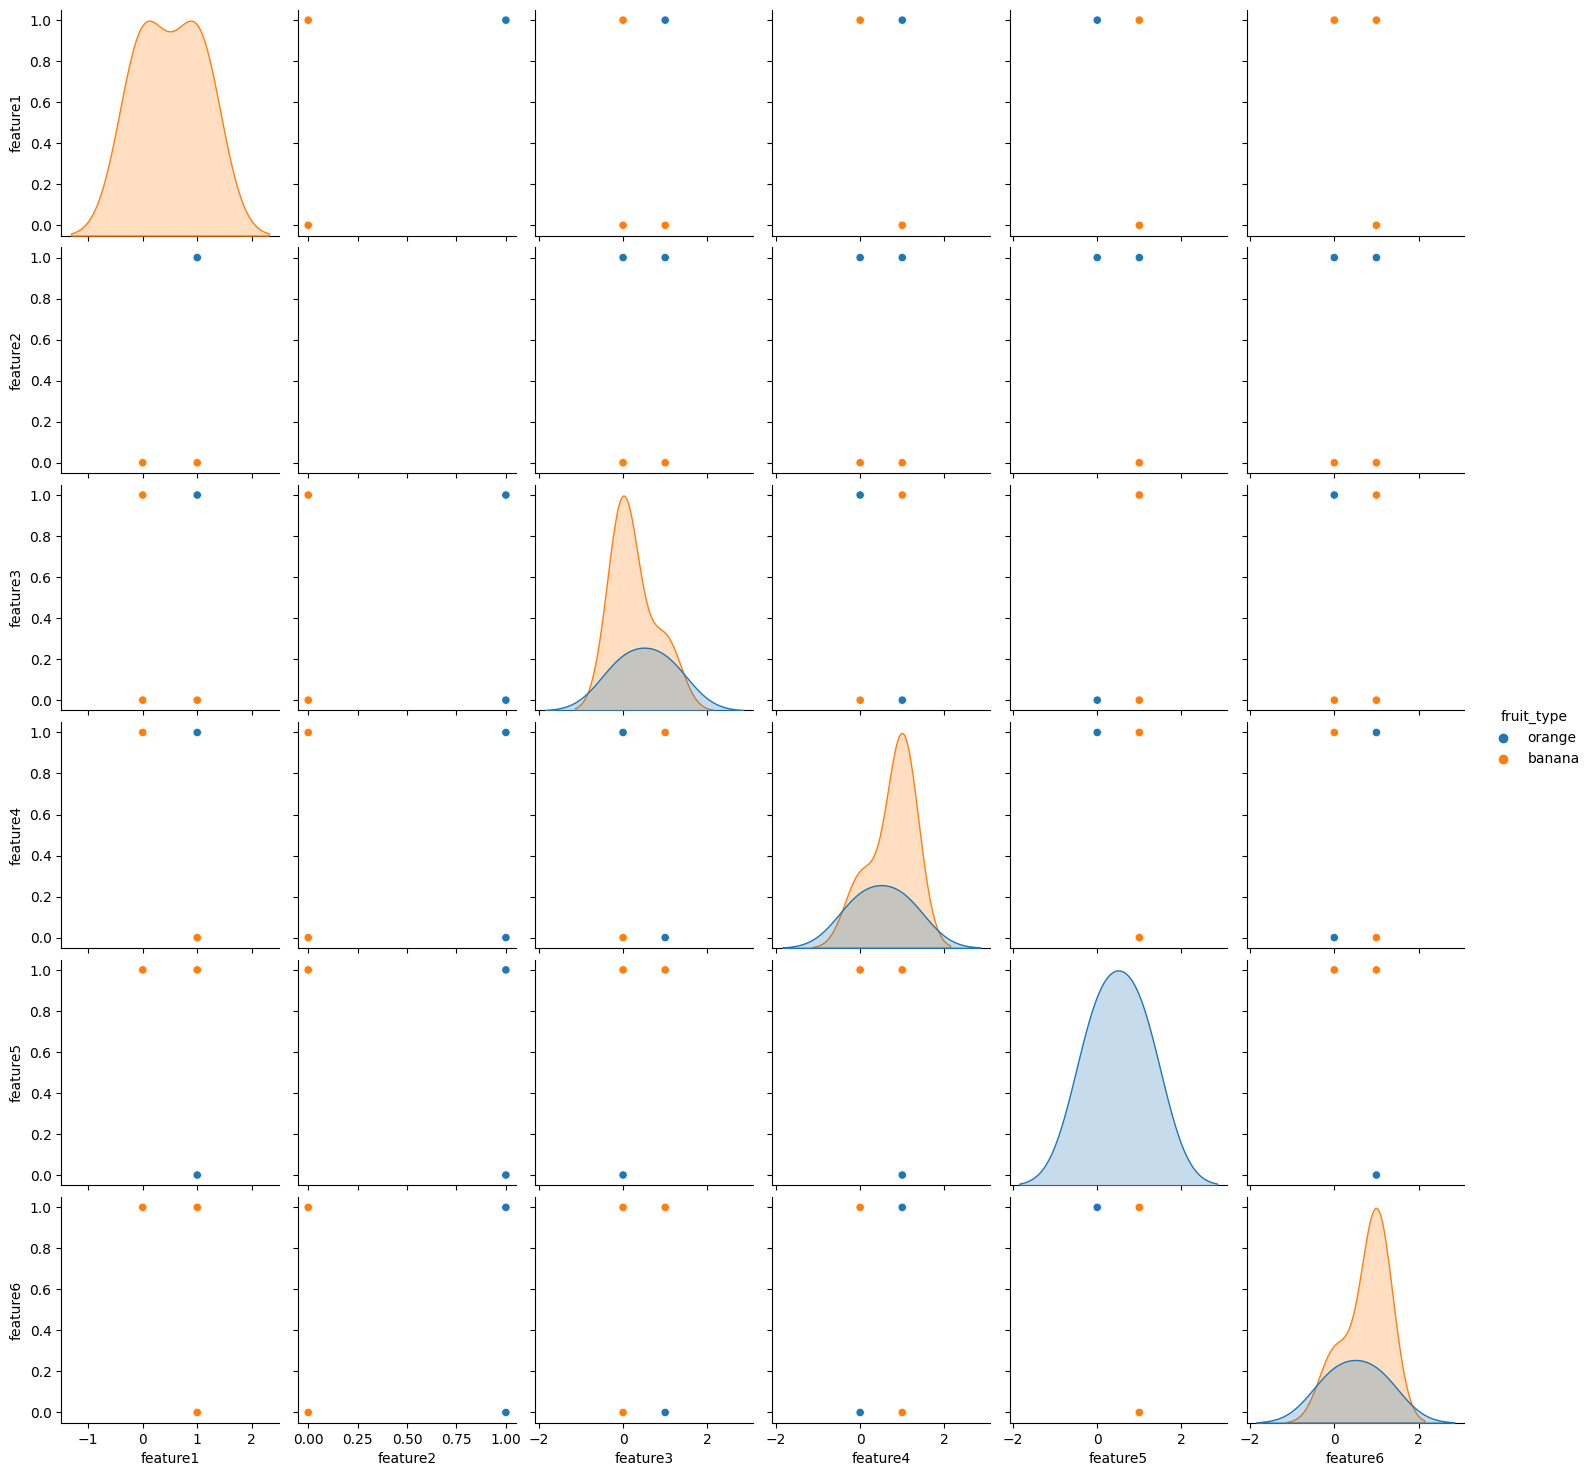

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Assuming you have a DataFrame called 'fruits_df' with six columns and a target column named 'fruit_type'
# Replace 'feature1', 'feature2', ..., 'feature6' with the actual column names in your DataFrame

# Load the data into a DataFrame
fruits_df = pd.DataFrame({
    'feature1': [1, 0, 0, 1, 1, 0, 1, 0],
    'feature2': [1, 1, 0, 1, 0, 1, 0, 0],
    'feature3': [1, 1, 1, 0, 0, 1, 0, 0],
    'feature4': [0, 1, 1, 1, 1, 0, 0, 1],
    'feature5': [1, 0, 1, 0, 1, 0, 1, 1],
    'feature6': [0, 0, 1, 1, 0, 0, 1, 1],
    'fruit_type': ['orange', 'orange', 'banana', 'orange', 'banana', 'orange', 'banana', 'banana']
})

# Separate the features and the target variable
X = fruits_df[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']]
y = fruits_df['fruit_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Combine the features and target variable into one DataFrame
fruits_data = pd.concat([X_train, y_train], axis=1)

# Create a scatter plot matrix
sns.pairplot(fruits_data, hue='fruit_type', diag_kind='kde')

# Show the plot
plt.show()

# Interpret the coefficients
from  math import exp
feature_names = X.columns
coefficients = logreg.coef_[0]

for feature, coefficient in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {exp(coefficient)}")


y_pred_prob = logreg.predict_proba(X_test)
# Set a custom threshold (e.g., 0.3)
custom_threshold = 0.8

# Classify the predictions based on the custom threshold
y_pred = (y_pred_prob[:, 1] >= custom_threshold).astype(int)
print(y_pred_prob)
print(y_pred)

Feature: feature1, Coefficient: 1.4545782111303314
Feature: feature2, Coefficient: 2.4537419756973216
Feature: feature3, Coefficient: 1.2585444465350786
Feature: feature4, Coefficient: 0.8408878503707513
Feature: feature5, Coefficient: 0.6294723859544672
Feature: feature6, Coefficient: 0.8408878503707513
[[0.45578472 0.54421528]
 [0.41323177 0.58676823]]
[0 0]


Visualize

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(df_con)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

# Pre-processing: Allergiesynt.

In [ ]:
## Clean the data
allergie_columns=['juckende Kopfhaut',
 'juckende Haut nach Baden',
 'juckende Haut',
 'juckende Nase oder Schnupfen ',
 'juckende Augen ',
 'Starke Allergie ',
 'Allergietablette genommen ',
 'Ausschlag nach Joggen auf Brust und Rücken ',
 'Starke Allergie nach Schlafen',
 'Halsschmerzen ',
 'Gustav berührt mich Ausschlag auf Haut ',
 'Leichte hibbel Gesicht ',
 'Starker Ausschlag Rücken ',
 'Dunkle Augenringe',
 'Allergie Gräser',]

df_non[allergie_columns] = df_non[allergie_columns].replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})

def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  return(unique_values)
# df_nan = df_non.dropna()
# df_nan.shape

## Pre-process the pollen allergy

In [ ]:
def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  list_unique = list(unique_values)
  '#Remove all date and Timestamp types'
  for x in list_unique[:]:
    if type(x)==str:
      if "2020" in x:
        list_unique.pop(list_unique.index(x))
    if pd._libs.tslibs.timestamps.Timestamp==type(x):
      list_unique.pop(list_unique.index(x))
  return(list_unique)


get_unique_values_df(df_non)


['', 0.0, 1.0, 'stark', 'mittel', nan, 'keine ']

In [ ]:
# Comine all syntome
# df_nan = df_non.dropna()
# df_nan[allergie_columns].sum().plot.pie()



pollen = ['Ambrosia',
 'Ampfer',
 'Beifuß',
 'Birke',
 'Buche',
 'Eiche',
 'Erle',
 'Esche',
 'Gräser',
 'Hasel',
 'Pappel',
 'Roggen',
 'Ulme',
 'Wegerich',
 'Weide',]

df_non[pollen] = df_non[pollen].replace({"Keine":0,"Schwach":1,"mittel":1,"stark":1,'keine ':0})
# df_nan.to_excel('df_nan.xlsx')

# files.download('df_nan.xlsx')

# Check Pre-processing


In [ ]:
#Now there should be only ['', 0.0, 1.0, nan] in the df

get_unique_values_df(df_non)

['', 0.0, 1.0, nan]

# EDA

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
allergie_dict =  {i:item for i,item in enumerate(allergie_columns)}
pp.pprint(allergie_dict)

df_test = pd.DataFrame({"a":[1,0,0,0],"b":[1,1,0,0],"c":[1,0,0,0]})
df_test
def combine_columns(row):
  """
  Combine serveral columns to see if one of the synptome appear.
  """
  if row.sum()>=1:
      return 1
  else:
      return 0

df_test['one_more_synptome'] = df_test.apply(combine_columns, axis=1)
df_test


{   0: 'juckende Kopfhaut',
    1: 'juckende Haut nach Baden',
    2: 'juckende Haut',
    3: 'juckende Nase oder Schnupfen ',
    4: 'juckende Augen ',
    5: 'Starke Allergie ',
    6: 'Allergietablette genommen ',
    7: 'Ausschlag nach Joggen auf Brust und Rücken ',
    8: 'Starke Allergie nach Schlafen',
    9: 'Halsschmerzen ',
    10: 'Gustav berührt mich Ausschlag auf Haut ',
    11: 'Leichte hibbel Gesicht ',
    12: 'Starker Ausschlag Rücken ',
    13: 'Dunkle Augenringe',
    14: 'Allergie Gräser'}


,a,b,c,one_more_synptome
0,1,1,1,1
1,0,1,0,1
2,0,0,0,0
3,0,0,0,0


In [ ]:
'#Select all row where allergy symptome where 1 and sum the columns '

allergy_symptome = [allergie_dict[x] for x in [0,1,2,3,4,5,7,8,10,11,12]]

#####################

'#Combins the selected allergy columns'
df_non['one_more_synptome'] = df_non[allergy_symptome].apply(combine_columns, axis=1)
df_symptome_true= df_non[df_non['one_more_synptome'] ==1]
day_symptome = df_non[df_non['one_more_synptome']==1 ].shape[0]
###########
# from google.colab import files
# df_non.to_excel('df.xlsx')
# files.download('df.xlsx')
#############
print(f"Days with at least one symptome:{day_symptome}. Total: {df_non.shape[0]}")
'#Drop all allergie rows'
allergie_columns.append("one_more_synptome")
df_symptome_true_drop = df_symptome_true.drop(columns=allergie_columns)
df_symptome_sum = df_symptome_true_drop.sum(axis=0)
'#Create a new df with the results'
df_result_symptome = pd.DataFrame.from_dict({"attribute":df_symptome_sum.drop("Datum").keys(),
                                 "sum":df_symptome_sum.drop("Datum").values
                                } )


'#Drop all row with a sum of ""'
df_result_symptome = df_result_symptome[df_result_symptome["sum"] != ""]
'#Select all rows with 0'
df_symptome_zero =  df_result_symptome[df_result_symptome["sum"] ==0]
print(list(df_symptome_zero["attribute"]))
######################
'Now we can check if a certian item is in the list'
'Nudelsuppe' in list(df_symptome_zero["attribute"])

'#Select all row !=0 and sort them'
df_symptome_non_zero =  df_result_symptome[df_result_symptome["sum"] !=0].sort_values("sum",ascending=False)
'#Calculate percentage'
df_symptome_non_zero["percent"]=df_symptome_non_zero["sum"]/float(df_symptome_non_zero[["sum"]].sum(axis=0))*100
df_symptome_non_zero["percent"] = df_symptome_non_zero["percent"].astype(float)
df_symptome_non_zero["percent"]=df_symptome_1["percent"].round()
plt.pie(x=df_symptome_non_zero["sum"],labels=df_symptome_non_zero["attribute"])
plt.show()
'#The following settings are need so that pandas show the whole table'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
'# Reset index'
df_symptome_non_zero = df_symptome_non_zero.reset_index()
df_symptome_non_zero.head(1000)



In [ ]:
'#Find the total times a item occurs'

'#Create a new df with the results'
dict_total_occurance = df_non.sum(axis=0).drop("Datum").to_dict()

df_symptome_non_zero.head()


def rel_occurance(row):
  '#Find for a item the total amount of occurances'
  total_occurance = dict_total_occurance[row["attribute"]]
  '#Caculate the relative occurance'
  return row["sum"]/total_occurance



df_symptome_non_zero['relative'] = df_symptome_non_zero.apply(rel_occurance, axis=1)

df_symptome_non_zero.sort_values(['relative','sum'], ascending=[False, False])

,index,attribute,sum,percent,relative
15,103,Allergiesymptome,7,2.0,1.000000
18,9,Birne,6,1.0,1.000000
27,48,Ravioli mit Brokkoli,3,1.0,1.000000
30,85,Milchreis,3,1.0,1.000000
32,52,Maultaschen,3,1.0,1.000000
34,15,nivea creme,3,1.0,1.000000
35,13,Mango,3,1.0,1.000000
37,75,Zuckerwaffel,2,0.0,1.000000
39,74,Kirsch Kuchen,2,0.0,1.000000
41,98,Grapefruitlimo,2,0.0,1.000000


In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
object_list = list(df_non.drop(columns=allergie_columns).keys())
object_dict =  {i:item for i,item in enumerate(object_list)}
pp.pprint(object_dict)
object_list.remove('Datum')

['Allergie Gräser']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

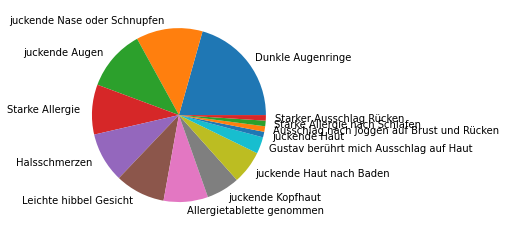

In [ ]:
'#Select all object to find out which allergy sympotme it caused'

# object_item = object_dict[281]
object_item = "Mango"
#####################
df_symptome= df_non[df_non[object_item]==1]
'#Drop all allergie rows'
df_symptome = df_symptome.drop(columns=object_list)

df_symptome_sum = df_symptome.sum(axis=0)

df_result_symptome = pd.DataFrame.from_dict({"attribute":df_symptome_sum.drop("Datum").keys(),
                                 "sum":df_symptome_sum.drop("Datum").values
                                } )


'#Drop all row with a sum of ""'
df_result_symptome = df_result_symptome[df_result_symptome["sum"] != ""]
'#Select all rows with 0'
df_symptome_zero =  df_result_symptome[df_result_symptome["sum"] ==0]
print(list(df_symptome_zero["attribute"]))
######################
'Now we can check if a certian item is in the list'
'Nudelsuppe' in list(df_symptome_zero["attribute"])

'#Select all row !=0 and sort them'
df_symptome_1=  df_result_symptome[df_result_symptome["sum"] !=0].sort_values("sum",ascending=False)
'#Calculate percentage'
df_symptome_1["percent"]=df_symptome_1["sum"]/float(df_result_symptome[["sum"]].sum(axis=0))*100
df_symptome_1["percent"] = df_symptome_1["percent"].astype(float)
df_symptome_1["percent"]=df_symptome_1["percent"].round()
plt.pie(x=df_symptome_1["sum"],labels=df_symptome_1["attribute"])
df_symptome_1



In [ ]:
sum

In [ ]:
### Make sum allergie
df_non['allergie_total'] = df_non[allergie_columns].sum(axis=1)

df_non.loc[df_non['allergie_total'] !=0.0, 'allergie_total_norm'] = 1
df_non['allergie_total_norm'] = df_non['allergie_total'].apply(lambda x: 1 if x >0.0 else 0)


0
allergie_total_norm    86
dtype: int64

In [ ]:
import scipy.stats as stats

def get_unique_values_df(df):
  column_values = df.values.ravel()
  unique_values =  pd.unique(column_values)
  print(unique_values)
#Remove all duplicate columns
df_nan = df_nan.loc[:,~df_nan.columns.duplicated()]
df_con = df_nan.drop(columns=["Datum_obj", "Datum"])

df_con_pre = df_con.replace({"FALSE":0,"1":1,"TRUE":1,"0":0,"n.a.n.":np.nan,"":0})
get_unique_values_df(df_con_pre)

result_dict={}

for i,el in enumerate(df_con_pre.keys()[:257]):
  # print(i)
  #If the shape is only 1 that means we never observed the event
  if el!='':
    if (len(df_con_pre[el].unique())!=1):
      confusion_matrix = pd.crosstab(df_con_pre['allergie_total_norm'], df_con_pre[el], rownames=['allergie_total'], colnames=[el])
      # sns.heatmap(confusion_matrix, annot=True)
      # plt.show()
      #### That is wrong! Now I need to find all rows where only "Tomatensuppe" was differnt

      oddsratio, pvalue = stats.fisher_exact(confusion_matrix.values)
      result_dict[el]=pvalue
      # print(pvalue)

df_result = pd.DataFrame.from_dict(result_dict,columns=["pvalue"], orient='index')

[0 1 'keine' 'schwach' 'stark' 'mittel' 2.0 3.0 4.0 5.0]


In [ ]:
df_result_index = df_result.reset_index()
df_sorted = df_result_index.sort_values(by=['pvalue'],ascending=False)
not_allergy = df_sorted[df_sorted["pvalue"]<=0.1].shape[0]
print(f"Total: {df_sorted.shape[0]}")
print(f"allergy: {df_sorted.shape[0]-not_allergy}/{not_allergy}")
print(df_sorted[df_sorted["pvalue"]<=0.1].shape)
display(df_sorted[df_sorted["pvalue"]<=0.1].head(15))
display(df_sorted.head(15))
"""***
######################
Next steps:
 - Create a logicstical
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
"""

SyntaxError: ignored

In [ ]:
df_non[[el,"Datum"]][df_non[el]=="True"]

In [ ]:
df_con_pre[el].unique()

array(['keine', 'schwach', 'mittel', 0], dtype=object)

In [ ]:
df_con_pre.keys()[259:]

Index(['Birke', 'Buche', 'Eiche', 'Erle', 'Esche', 'Gräser', 'Hasel', 'Pappel',
       'Roggen', 'Ulme', 'Wegerich', 'Weide', 'allergie_total',
       'allergie_total_norm'],
      dtype='object', name=0)

# Posture

In [ ]:
el = [0]
el

'2020-07-26_bevore'

In [ ]:
gesamt={"2020-07-26_bevore":[14.5,15,15,13,14,13,13,11.5,11,15,14,14,14,13.5,13],
        "2020-07-26_after":[12,12,12,12.5,12,13,12,12.5,12,13,12,12.5]}

var_right:1.2747548783981961,:mean_right:13.25
var_left:1.6723860200324565,:mean_left:13.375
##### 2020-07-26_bevore #####
std:1.1527744310527057,:mean:13.566666666666666
##############
##### 2020-07-26_after #####
std:0.3796013991310125,:mean:12.291666666666666
##############
##### 2020-07-27_bevore #####
std:0.2763853991962833,:mean:10.916666666666666
##############
##### 2020-07-27_after #####
std:0.8281086214313246,:mean:9.958333333333334
##############
##### 2020-07-28_bevore #####
std:0.6277716322216401,:mean:10.958333333333334
##############
##### 2020-07-28_after #####
std:0.6492207662311681,:mean:8.681818181818182
##############
##### 2020-07-29_bevore #####
std:0.4714045207910317,:mean:9.666666666666666
##############
##### 2020-07-29_after #####
std:0.3796013991310125,:mean:9.791666666666666
##############


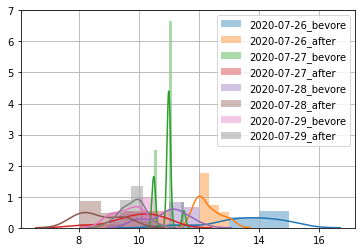

In [ ]:
 # Svenja
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns

right = np.array([11.5,11,15,14,14,14,13.5,13])
mean_right = np.mean(right)
std_right = np.std(right)
print(f"var_right:{std_right},:mean_right:{mean_right}")
left = np.array([9.5,14.5,15,15,13,14,13,13])
mean_left = np.mean(left)
std_left = np.std(left)
print(f"var_left:{std_left},:mean_left:{mean_left}")

### Create the Probability density function
plt.grid(True)
uebungen={"2020-07-26_uebungen":["Ball","Kopf_dehnen"],
         "2020-07-27_uebungen":["Türe","Ball","Kopf_dehnen"]}
gesamt={"2020-07-26_bevore":[14.5,15,15,13,14,13,13,11.5,11,15,14,14,14,13.5,13],
        "2020-07-26_after":[12,12,12,12.5,12,13,12,12.5,12,13,12,12.5],
        "2020-07-27_bevore":[10.5,11,11,10.5,11,11,11,10.5,11,11.5,11,11],
        "2020-07-27_after":[9, 9.5, 8., 9.5, 10, 10, 10.5, 11, 10.5, 11, 10, 10.5 ],
        "2020-07-28_bevore":[10,10,11,11,11.5,11,11.5,10,12,11,11.5,11],
        "2020-07-28_after":[9.5, 8, 9.5, 9.5, 9.5, 8.5, 8.5, 8, 8, 8., 8.5],
        "2020-07-29_bevore":[10, 9, 10, 10.5, 9,10, 10, 9.5, 9.5, 9, 10, 9.5],
        "2020-07-29_after":[10, 10.5, 9.5, 10, 9.5, 10, 9.5, 10,9, 9.5, 10, 10],
        }
mean = np.mean(gesamt["2020-07-26_bevore"])
std = np.std(gesamt["2020-07-26_bevore"])

for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()


In [ ]:
from google.colab import files
gesamt={"2020-07--26-before":[13,12.7,12.5,13,12.5,12.5,  12.3,12.1,12.2,12.6,12.6,12.6,0,0,0,0],
        "2020-07-26_after":[12.5,12.6,12.8,12.7,12.6,13.1,12.3,12.3,12.6,12.7,12.3,12.2,0,0,0,0],
        "2020-07-26_after_2":[12.6,12.4,12.7,12.3,12.6,12.5,11.8,12.2,12.5,11.9,12.5,12.5,0,0,0,0],
        "2020-07-27-before":[12, 11.6, 13, 12.5, 12.5, 12.3, 12.8, 12.2,    13.2, 12.3, 12.5, 11.9, 12.5, 12.5, 12.9, 12.3],
        "2020-07-27_after":[12.5, 11.8, 12.5, 11.8, 12.7, 12.4, 12.8, 12.6, 12.6, 12.7, 12.8, 12.6, 12.7, 13,0,0],}

for el in gesamt.keys():
    print(len(gesamt[el]))
df = pd.DataFrame.from_dict(gesamt)
df.to_excel('df.xlsx')
files.download('df.xlsx')

16
16
16
16
16


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for el in list(df_proc_fin.keys()):
  print(el)
  df_proc_fin[el] = df_proc_fin[el].astype(float)

Sunday, 26 July 2020 - Before
Sunday, 26 July 2020 - After
Monday, 27 July 2020 - Before
Monday, 27 July 2020 - After
Monday, 27 July 2020 - After_2
Tuesday, 28 July 2020 - Before
Tuesday, 28 July 2020 - After
Tuesday, 28 July 2020 - After 2
Wednesday, 29 July 2020 - Before


ValueError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,"Sunday, 26 July 2020 - Before","Sunday, 26 July 2020 - After","Monday, 27 July 2020 - Before","Monday, 27 July 2020 - After","Monday, 27 July 2020 - After_2","Tuesday, 28 July 2020 - Before","Tuesday, 28 July 2020 - After","Tuesday, 28 July 2020 - After 2","Tuesday, 28 July 2020 - After 3","Tuesday, 28 July 2020 - After 4","Tuesday, 28 July 2020 - After 5","Wednesday, 29 July 2020 - Before","Wednesday, 29 July 2020 - After","Thursday, 30 July 2020 - Before","Thursday, 30 July 2020 - After","Friday, 31 July 2020 - Before","Friday, 31 July 2020 - After","Saturday, 1 August 2020 - Before","Saturday, 1 August 2020 - After","Sunday, 2 August 2020 - Before","Saturday, 1 August 2020 - After","Sunday, 2 August 2020 - Before","Sunday, 2 August 2020 - After","Monday, 3 August 2020 - Before","Monday, 3 August 2020 - After","Tuesday, 4 August 2020 - Before","Wednesday, 5 August 2020 - After"
2,13,12.5,12.6,12.5,12.5,11.4,11.9,11.8,11.8,11.8,11.5,11.9,11.5,,,,,,,,,,,,,,
3,12.7,12.6,12.4,12.5,11.8,11.8,12.2,11.7,11.7,11.9,12.1,12,11.9,,,,,,,,,,,,,,
4,12.5,12.8,12.7,12.9,12.5,11.9,11.7,11.8,11.8,12,11.5,11.9,11.9,,,,,,,,,,,,,,
5,13,12.7,12.3,12.3,11.8,11.8,12.1,11.8,11.8,11.5,11.7,11.8,11.9,,,,,,,,,,,,,,
6,12.5,12.6,12.6,12.5,12.7,11.6,12.1,11.5,11.5,11.5,11.5,12.2,11.5,,,,,,,,,,,,,,
7,12.5,13.1,12.5,12.3,12.4,12.1,13,12,12,11.6,12.2,11.5,12.3,,,,,,,,,,,,,,
8,12.3,12.3,11.8,12.8,12.8,12.1,12.2,12.2,12.2,11.5,11.7,12,11.8,,,,,,,,,,,,,,
9,12.1,12.3,12.2,12.2,12.6,12.5,11.8,12.2,12.2,12,11.7,11.7,12.1,,,,,,,,,,,,,,
10,12.2,12.6,12.5,13.2,12.6,12.5,12.2,12.5,12.5,12.2,12.1,12.2,11.8,,,,,,,,,,,,,,
11,12.6,12.7,11.9,12.3,12.7,12.8,12.1,12.4,12.4,12.2,12.2,12,12.1,,,,,,,,,,,,,,


##### Sunday, 26 July 2020 - Before #####
std:0.26299556396765833,:mean:12.549999999999999
##### Sunday, 26 July 2020 - After #####
std:0.24650332429581714,:mean:12.558333333333332
##### Monday, 27 July 2020 - Before #####
std:0.26809513236908994,:mean:12.375
##### Monday, 27 July 2020 - After #####
std:0.3302986863767734,:mean:12.491666666666667
##### Monday, 27 July 2020 - After_2 #####
std:0.32617309651301524,:mean:12.483333333333333
##### Tuesday, 28 July 2020 - Before #####
std:0.40173235977313165,:mean:12.083333333333334
##### Tuesday, 28 July 2020 - After #####
std:0.31743328257901515,:mean:12.141666666666667
##### Tuesday, 28 July 2020 - After 2 #####
std:0.28124228384476996,:mean:11.991666666666667
##### Tuesday, 28 July 2020 - After 3 #####
std:0.28124228384476996,:mean:11.991666666666667
##### Tuesday, 28 July 2020 - After 4 #####
std:0.3252136050181308,:mean:11.891666666666667
##### Tuesday, 28 July 2020 - After 5 #####
std:0.32776600732161887,:mean:11.858333333333333
#####

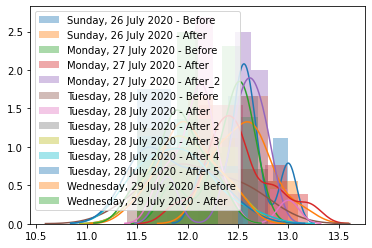

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns
'#2.Step: Authorize colab to access the spread sheet'
%matplotlib notebook
%matplotlib inline
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wkgMSGum811QOf3awF-cp_5-4vOc7RRBUFnqGpJFBNw/edit?usp=sharing')
'#3.Step: Load the measurement data  from the speadsheet'
sheet = wb.worksheet('data')
data = sheet.get_all_values()
df = pd.DataFrame(data)
'#4.Step: Combine the frist and second row (date and before|after)'
df.iloc[0] = df.iloc[0]+" - "+df.iloc[1]
'#4.1.Step: Drop the row with before| after'
df_proc = df.drop(df.index[1])
# display(df_proc.head())
'#4.2.Step: Drop column 0'
df_proc_drop = df.drop(columns=[0])
# display(df_proc_fin.head())
'#5.Step: Set first row as column name'
df_proc_fin = df_proc_drop.rename(columns=df_proc_drop.iloc[0]).drop([0,1])
display(df_proc_fin)

'# Load the exercise data from the spreadsheet'
sheet = wb.worksheet('exercise')
data = sheet.get_all_values()
df_exercise = pd.DataFrame(data)
df_exercise = df_exercise.rename(columns=df_exercise.iloc[0]).drop([0])
df_exercise.head()

# Visualize the data
for el in list(df_proc_fin.loc[:,:"Wednesday, 29 July 2020 - After"].keys()):
  print(f"##### {el} #####")
  df_proc_fin[el] = df_proc_fin[el].astype(float)
  print(f"std:{np.std(df_proc_fin[el].values)},:mean:{np.mean(df_proc_fin[el].values)}")
  ax = sns.distplot(df_proc_fin[el].values,label=el)
plt.legend()

##### Sunday, 26 July 2020 - Before #####
std:0.26299556396765833,:mean:12.549999999999999
##### Sunday, 26 July 2020 - After #####
std:0.24650332429581714,:mean:12.558333333333332
##### Monday, 27 July 2020 - Before #####
std:0.26809513236908994,:mean:12.375
##### Monday, 27 July 2020 - After #####
std:0.3302986863767734,:mean:12.491666666666667
##### Monday, 27 July 2020 - After_2 #####
std:0.32617309651301524,:mean:12.483333333333333
##### Tuesday, 28 July 2020 - Before #####
std:0.40173235977313165,:mean:12.083333333333334
##### Tuesday, 28 July 2020 - After #####
std:0.31743328257901515,:mean:12.141666666666667
##### Tuesday, 28 July 2020 - After 2 #####
std:0.28124228384476996,:mean:11.991666666666667


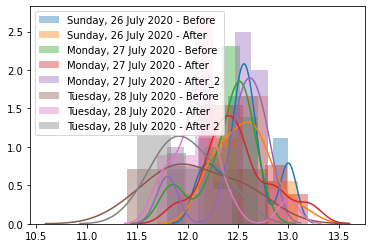

In [ ]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

df = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Year_2018': [3.26, 6.11, 4.86, 6.53, 4.45, 3.86, 8.04, 7.59, 1.48, 4.75, 7.27, 11.83],
    'Year_1996': [8.26, 3.82, 6.42, 2.91, 2.12, 1.70, 2.14, 4.66, 4.32, 0.89, 3.22, 4.14]
}
)
df

configure_plotly_browser_state()
for el in list(df_proc_fin.loc[:,:"Tuesday, 28 July 2020 - After 2"].keys()):
  print(f"##### {el} #####")
  df_proc_fin[el] = df_proc_fin[el].astype(float)
  print(f"std:{np.std(df_proc_fin[el].values)},:mean:{np.mean(df_proc_fin[el].values)}")
  ax = sns.distplot(df_proc_fin[el].values,label=el)
plt.legend()
df.iplot(kind='line',x='month',y=['Year_2018', 'Year_1996'], color=['white', 'gold'],
theme='solar', mode='markers+lines',title='Annual Rainfall in the city Peachtree City, GA')
plt.show()

In [ ]:
#PLot the data from df
for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()

##### 2020-07--26-before #####
std:0.26299556396765833,:mean:12.549999999999999
##############
##### 2020-07-26_after #####
std:0.24650332429581714,:mean:12.558333333333332
##############
##### 2020-07-26_after_2 #####
std:0.26809513236908994,:mean:12.375
##############
##### 2020-07-27-before #####
std:0.39980463979298686,:mean:12.4375
##############
##### 2020-07-27_after #####
std:0.3329674863087616,:mean:12.535714285714283
##############


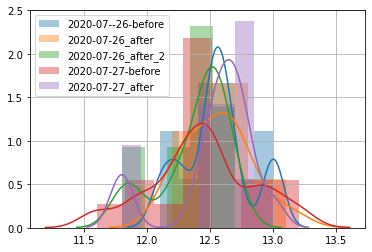

In [ ]:
# Gustav
### Create the Probability density function
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
import seaborn as sns



"""
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wkgMSGum811QOf3awF-cp_5-4vOc7RRBUFnqGpJFBNw/edit?usp=sharing')
'#3.Step: Load the data from the speadsheet'
sheet = wb.worksheet('gustav')
data = sheet.get_all_values()
df = pd.DataFrame(data)
"""
##################
plt.grid(True)
uebungen={"2020-07-26_uebungen":["Ball","Kopf_dehnen"],
         "2020-07-27_uebungen":["Türe_dehnen","Supermann","dog","strecken_couch"]}
#Übungen für morgen: https://westcoastsci.com/general-blog/2018/11/2/hunchback-of-notre-dont-5-easy-exercises-to-correct-thoracic-kyphosis
gesamt={"2020-07--26-before":[13,12.7,12.5,13,12.5,12.5,  12.3,12.1,12.2,12.6,12.6,12.6,0,0,0,0],
        "2020-07-26_after":[12.5,12.6,12.8,12.7,12.6,13.1,12.3,12.3,12.6,12.7,12.3,12.2,0,0,0,0],
        "2020-07-26_after_2":[12.6,12.4,12.7,12.3,12.6,12.5,11.8,12.2,12.5,11.9,12.5,12.5,0,0,0,0],
        "2020-07-27-before":[12, 11.6, 13, 12.5, 12.5, 12.3, 12.8, 12.2,    13.2, 12.3, 12.5, 11.9, 12.5, 12.5, 12.9, 12.3],
        "2020-07-27_after":[12.5, 11.8, 12.5, 11.8, 12.7, 12.4, 12.8, 12.6, 12.6, 12.7, 12.8, 12.6, 12.7, 13,0,0],}


for el in list(gesamt.keys()):
  print(f"##### {el} #####")
  print(f"std:{np.std(gesamt[el])},:mean:{np.mean(gesamt[el])}")
  ax = sns.distplot(gesamt[el],label=el)
  print(f"##############")
plt.legend()

# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
plt.show()





In [ ]:
html= "]]></script><linearGradient id="bgcolor" x1="20%" y1="0%" x2="80%" y2="100%"><stop offset="0%" stop-color="#FFFFFF"/><stop offset="100%" stop-color="#FFFFFF"/></linearGradient><linearGradient id="g_gelb" x1="0%" y1="0%" x2="100%" y2="100%"><stop offset="0%" stop-color="#FFFFAA"/><stop offset="100%" stop-color="#EEC620"/></linearGradient><linearGradient id="steel" x1="20%" y1="0%" x2="50%" y2="100%"><stop offset="0%" stop-color="#DFDFDF"/><stop offset="100%" stop-color="#8F8F8F"/></linearGradient><linearGradient id="steelreports" x1="20%" y1="0%" x2="50%" y2="100%"><stop offset="0%" stop-color="#DDDDDD"/><stop offset="100%" stop-color="#BBBBBB"/></linearGradient><linearGradient id="steeldark" x1="20%" y1="0%" x2="50%" y2="100%"><stop offset="0%" stop-color="#DFDFDF"/><stop offset="100%" stop-color="#232323"/></linearGradient><linearGradient id="epoch" x1="0%" y1="0%" x2="100%" y2="0%"><stop stop-color="#333333" offset="0"/><stop stop-color="#7DB9E8" offset="0.5"/><stop stop-color="#FFFFFF" stop-opacity="0" offset="1"/></linearGradient><clipPath id="clip0"><rect x="-2" y="-3" height="37" width="552.5"/></clipPath><filter id="drop-shadow" x="-50%" y="-50%" width="200%" height="200%">	<feOffset result="copy" in="SourceAlpha" dx="1" dy="1"/>	<feGaussianBlur result="copy" in="copy" stdDeviation="1"/>	<feColorMatrix result="copy" in="copy" type="matrix" values="0 0 0 0 0, 0 0 0 0 0, 0 0 0 0 0, 0 0 0 0.3 0" />	<feBlend in="SourceGraphic" in2="copy" mode="normal"/></filter><filter id="drop-shadow-dark" x="-50%" y="-50%" width="200%" height="200%">	<feOffset result="copy" in="SourceAlpha" dx="1" dy="1"/>	<feGaussianBlur result="copy" in="copy" stdDeviation="1"/>	<feColorMatrix result="copy" in="copy" type="matrix" values="0 0 0 0 0, 0 0 0 0 0, 0 0 0 0 0, 0 0 0 0.9 0" />	<feBlend in="SourceGraphic" in2="copy" mode="normal"/></filter></defs>"

In [ ]:
onmousemove_content = "overfill(evt,2,'02.07.22[br]Ertrag: 181 kWh','url(#g_blau)')"

onmousemove_content.split("[br]")[0].split(",'")[1]

'02.07.22'

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
# The provided SVG code
svg_code = '''
<svg width="100" height="100">
  <g onmousemove="handleMouseMove()">
    <rect x="10" y="10" width="30" height="30" fill="blue" />
    <line x1="10" y1="60" x2="50" y2="60" stroke="black" />
    <text x="10" y="80" font-family="Arial" fill="black" onmousemove="handleTextMouseMove()">Sample Text</text>
  </g>
</svg>
'''

def extract_onmousemove_content(svg_code):
    # Parse the SVG code with BeautifulSoup
    soup = BeautifulSoup(svg_code, 'html.parser')

    # Find all elements that have an "onmousemove" attribute
    elements_with_onmousemove = soup.find_all(onmousemove=True)

    # Extract and print the content of the "onmousemove" attribute from each element
    result_dict = {"date":[],"wert":[]}
    for element in elements_with_onmousemove:
        onmousemove_content = element['onmousemove']
        if "Ertrag" in onmousemove_content:
          print(onmousemove_content)
          date  = onmousemove_content.split("[br]")[0].split(",'")[1]
          wert = onmousemove_content.split("[br]")[1].replace("Ertrag: ","").split(" kWh',")[0]
          result_dict["date"].append(date)
          result_dict["wert"].append(wert)
          # print(result_dict)
    return result_dict
extract_onmousemove_content(svg_code)


'''#Note: To get the data: you go to https://home15.solarlog-web.de/emulated_graphics_2675.html? open the network traffic than
and the traffic Statistik.php?top=100&left=70&right=120&bottom contains the following data at the bottom in tab response
'''
text_06_2022 = """
<g id="refresher" transform="scale(1)"><rect id="bgcolor" x="0" y="0" width="100%" height="100%" fill="url(#bgcolor)"></rect>
<g id="wait" style="display:none;font-family:Verdana;font-size:10px;" class="shadowed" filter="url(#drop-shadow)"><rect x="3" y="3" ry="4" height="14" width="230" style="fill:#EEE;opacity:0.95;" /><text dx="10" dy="13">Daten werden geladen...</text></g>
<g id="main" transform="translate(0 0) scale(1 1)" preserveAspectRatio="xMidYMid meet"><rect x="70" y="100" width="580" height="280" style="opacity:0.8;fill:#FFFFFF" class="shadowed" filter="url(#drop-shadow)"/>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999" text-anchor="middle"><line x1="70" y1="122" x2="650" y2="122" style=""/><line x1="70" y1="150.8" x2="650" y2="150.8" style=""/><line x1="70" y1="179.5" x2="650" y2="179.5" style=""/><line x1="70" y1="208.2" x2="650" y2="208.2" style=""/><line x1="70" y1="236.9" x2="650" y2="236.9" style=""/><line x1="70" y1="265.6" x2="650" y2="265.6" style=""/><line x1="70" y1="294.3" x2="650" y2="294.3" style=""/><line x1="70" y1="323.1" x2="650" y2="323.1" style=""/><line x1="70" y1="351.8" x2="650" y2="351.8" style=""/></g>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999"><line x1="69.5" y1="100" x2="69.5" y2="380"/><line x1="88.2" y1="100" x2="88.2" y2="380"/><line x1="106.9" y1="100" x2="106.9" y2="380"/><line x1="125.6" y1="100" x2="125.6" y2="380"/><line x1="144.3" y1="100" x2="144.3" y2="380"/><line x1="163" y1="100" x2="163" y2="380"/><line x1="181.8" y1="100" x2="181.8" y2="380"/><line x1="200.5" y1="100" x2="200.5" y2="380"/><line x1="219.2" y1="100" x2="219.2" y2="380"/><line x1="237.9" y1="100" x2="237.9" y2="380"/><line x1="256.6" y1="100" x2="256.6" y2="380"/><line x1="275.3" y1="100" x2="275.3" y2="380"/><line x1="294" y1="100" x2="294" y2="380"/><line x1="312.7" y1="100" x2="312.7" y2="380"/><line x1="331.4" y1="100" x2="331.4" y2="380"/><line x1="350.1" y1="100" x2="350.1" y2="380"/><line x1="368.9" y1="100" x2="368.9" y2="380"/><line x1="387.6" y1="100" x2="387.6" y2="380"/><line x1="406.3" y1="100" x2="406.3" y2="380"/><line x1="425" y1="100" x2="425" y2="380"/><line x1="443.7" y1="100" x2="443.7" y2="380"/><line x1="462.4" y1="100" x2="462.4" y2="380"/><line x1="481.1" y1="100" x2="481.1" y2="380"/><line x1="499.8" y1="100" x2="499.8" y2="380"/><line x1="518.5" y1="100" x2="518.5" y2="380"/><line x1="537.2" y1="100" x2="537.2" y2="380"/><line x1="556" y1="100" x2="556" y2="380"/><line x1="574.7" y1="100" x2="574.7" y2="380"/><line x1="593.4" y1="100" x2="593.4" y2="380"/><line x1="612.1" y1="100" x2="612.1" y2="380"/><line x1="630.8" y1="100" x2="630.8" y2="380"/></g>
<g style="cursor:pointer;opacity:0.9;stroke-width:1;stroke:orange" fill="url(#g_gelb)" class="shadowed" filter="url(#drop-shadow)"><rect id="p1" x="80.8" y="129.1" width="15.9" height="250.4" fill="url(#g_gelb)" onmousemove="overfill(evt,1,'01.06.22[br]Ertrag: 174.39 kWh','url(#g_blau)')" onmouseout="outfill(evt,1,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-423);loadPage();"></rect><rect id="p2" x="99.5" y="151" width="15.9" height="228.5" fill="url(#g_gelb)" onmousemove="overfill(evt,2,'02.06.22[br]Ertrag: 159.11 kWh','url(#g_blau)')" onmouseout="outfill(evt,2,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-422);loadPage();"></rect><rect id="p3" x="118.2" y="196.4" width="15.9" height="183.1" fill="url(#g_gelb)" onmousemove="overfill(evt,3,'03.06.22[br]Ertrag: 127.54 kWh','url(#g_blau)')" onmouseout="outfill(evt,3,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-421);loadPage();"></rect><rect id="p4" x="136.9" y="256.4" width="15.9" height="123.1" fill="url(#g_gelb)" onmousemove="overfill(evt,4,'04.06.22[br]Ertrag: 85.73 kWh','url(#g_blau)')" onmouseout="outfill(evt,4,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-420);loadPage();"></rect><rect id="p5" x="155.6" y="298.2" width="15.9" height="81.3" fill="url(#g_gelb)" onmousemove="overfill(evt,5,'05.06.22[br]Ertrag: 56.6 kWh','url(#g_blau)')" onmouseout="outfill(evt,5,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-419);loadPage();"></rect><rect id="p6" x="174.3" y="243.5" width="15.9" height="136" fill="url(#g_gelb)" onmousemove="overfill(evt,6,'06.06.22[br]Ertrag: 94.73 kWh','url(#g_blau)')" onmouseout="outfill(evt,6,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-418);loadPage();"></rect><rect id="p7" x="193" y="173.4" width="15.9" height="206.1" fill="url(#g_gelb)" onmousemove="overfill(evt,7,'07.06.22[br]Ertrag: 143.53 kWh','url(#g_blau)')" onmouseout="outfill(evt,7,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-417);loadPage();"></rect><rect id="p8" x="211.7" y="194.6" width="15.9" height="184.9" fill="url(#g_gelb)" onmousemove="overfill(evt,8,'08.06.22[br]Ertrag: 128.78 kWh','url(#g_blau)')" onmouseout="outfill(evt,8,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-416);loadPage();"></rect><rect id="p9" x="230.4" y="183.1" width="15.9" height="196.4" fill="url(#g_gelb)" onmousemove="overfill(evt,9,'09.06.22[br]Ertrag: 136.79 kWh','url(#g_blau)')" onmouseout="outfill(evt,9,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-415);loadPage();"></rect><rect id="p10" x="249.1" y="130" width="15.9" height="249.5" fill="url(#g_gelb)" onmousemove="overfill(evt,10,'10.06.22[br]Ertrag: 173.75 kWh','url(#g_blau)')" onmouseout="outfill(evt,10,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-414);loadPage();"></rect><rect id="p11" x="267.9" y="127.9" width="15.9" height="251.6" fill="url(#g_gelb)" onmousemove="overfill(evt,11,'11.06.22[br]Ertrag: 175.21 kWh','url(#g_blau)')" onmouseout="outfill(evt,11,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-413);loadPage();"></rect><rect id="p12" x="286.6" y="134.4" width="15.9" height="245.1" fill="url(#g_gelb)" onmousemove="overfill(evt,12,'12.06.22[br]Ertrag: 170.71 kWh','url(#g_blau)')" onmouseout="outfill(evt,12,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-412);loadPage();"></rect><rect id="p13" x="305.3" y="138.9" width="15.9" height="240.6" fill="url(#g_gelb)" onmousemove="overfill(evt,13,'13.06.22[br]Ertrag: 167.57 kWh','url(#g_blau)')" onmouseout="outfill(evt,13,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-411);loadPage();"></rect><rect id="p14" x="324" y="125.3" width="15.9" height="254.2" fill="url(#g_gelb)" onmousemove="overfill(evt,14,'14.06.22[br]Ertrag: 177.03 kWh','url(#g_blau)')" onmouseout="outfill(evt,14,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-410);loadPage();"></rect><rect id="p15" x="342.7" y="125.3" width="15.9" height="254.2" fill="url(#g_gelb)" onmousemove="overfill(evt,15,'15.06.22[br]Ertrag: 177.06 kWh','url(#g_blau)')" onmouseout="outfill(evt,15,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-409);loadPage();"></rect><rect id="p16" x="361.4" y="147.5" width="15.9" height="232" fill="url(#g_gelb)" onmousemove="overfill(evt,16,'16.06.22[br]Ertrag: 161.56 kWh','url(#g_blau)')" onmouseout="outfill(evt,16,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-408);loadPage();"></rect><rect id="p17" x="380.1" y="132.3" width="15.9" height="247.2" fill="url(#g_gelb)" onmousemove="overfill(evt,17,'17.06.22[br]Ertrag: 172.12 kWh','url(#g_blau)')" onmouseout="outfill(evt,17,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-407);loadPage();"></rect><rect id="p18" x="398.8" y="143.6" width="15.9" height="235.9" fill="url(#g_gelb)" onmousemove="overfill(evt,18,'18.06.22[br]Ertrag: 164.25 kWh','url(#g_blau)')" onmouseout="outfill(evt,18,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-406);loadPage();"></rect><rect id="p19" x="417.5" y="137.2" width="15.9" height="242.3" fill="url(#g_gelb)" onmousemove="overfill(evt,19,'19.06.22[br]Ertrag: 168.74 kWh','url(#g_blau)')" onmouseout="outfill(evt,19,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-405);loadPage();"></rect><rect id="p20" x="436.2" y="226.2" width="15.9" height="153.3" fill="url(#g_gelb)" onmousemove="overfill(evt,20,'20.06.22[br]Ertrag: 106.73 kWh','url(#g_blau)')" onmouseout="outfill(evt,20,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-404);loadPage();"></rect><rect id="p21" x="455" y="148.1" width="15.9" height="231.4" fill="url(#g_gelb)" onmousemove="overfill(evt,21,'21.06.22[br]Ertrag: 161.18 kWh','url(#g_blau)')" onmouseout="outfill(evt,21,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-403);loadPage();"></rect><rect id="p22" x="473.7" y="283.7" width="15.9" height="95.8" fill="url(#g_gelb)" onmousemove="overfill(evt,22,'22.06.22[br]Ertrag: 66.7 kWh','url(#g_blau)')" onmouseout="outfill(evt,22,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-402);loadPage();"></rect><rect id="p23" x="492.4" y="156.4" width="15.9" height="223.1" fill="url(#g_gelb)" onmousemove="overfill(evt,23,'23.06.22[br]Ertrag: 155.39 kWh','url(#g_blau)')" onmouseout="outfill(evt,23,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-401);loadPage();"></rect><rect id="p24" x="511.1" y="194.6" width="15.9" height="184.9" fill="url(#g_gelb)" onmousemove="overfill(evt,24,'24.06.22[br]Ertrag: 128.76 kWh','url(#g_blau)')" onmouseout="outfill(evt,24,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-400);loadPage();"></rect><rect id="p25" x="529.8" y="136" width="15.9" height="243.5" fill="url(#g_gelb)" onmousemove="overfill(evt,25,'25.06.22[br]Ertrag: 169.55 kWh','url(#g_blau)')" onmouseout="outfill(evt,25,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-399);loadPage();"></rect><rect id="p26" x="548.5" y="133.7" width="15.9" height="245.8" fill="url(#g_gelb)" onmousemove="overfill(evt,26,'26.06.22[br]Ertrag: 171.2 kWh','url(#g_blau)')" onmouseout="outfill(evt,26,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-398);loadPage();"></rect><rect id="p27" x="567.2" y="293.3" width="15.9" height="86.2" fill="url(#g_gelb)" onmousemove="overfill(evt,27,'27.06.22[br]Ertrag: 60.04 kWh','url(#g_blau)')" onmouseout="outfill(evt,27,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-397);loadPage();"></rect><rect id="p28" x="585.9" y="137.6" width="15.9" height="241.9" fill="url(#g_gelb)" onmousemove="overfill(evt,28,'28.06.22[br]Ertrag: 168.47 kWh','url(#g_blau)')" onmouseout="outfill(evt,28,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-396);loadPage();"></rect><rect id="p29" x="604.6" y="208.3" width="15.9" height="171.2" fill="url(#g_gelb)" onmousemove="overfill(evt,29,'29.06.22[br]Ertrag: 119.2 kWh','url(#g_blau)')" onmouseout="outfill(evt,29,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-395);loadPage();"></rect><rect id="p30" x="623.3" y="171.1" width="15.9" height="208.4" fill="url(#g_gelb)" onmousemove="overfill(evt,30,'30.06.22[br]Ertrag: 145.11 kWh','url(#g_blau)')" onmouseout="outfill(evt,30,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-394);loadPage();"></rect></g>
<g style="cursor:pointer" fill="#AFEF9F" class="shadowed" filter="url(#drop-shadow)"></g>

<g style="cursor:pointer;opacity:1.0;stroke-width:1;stroke:#71A171" fill="#71A171"><rect id="p31" x="78.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,31,'01.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,31,'#71A171')" onclick="click(evt,31)"></rect><rect id="p32" x="97.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,32,'02.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,32,'#71A171')" onclick="click(evt,32)"></rect><rect id="p33" x="116.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,33,'03.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,33,'#71A171')" onclick="click(evt,33)"></rect><rect id="p34" x="135" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,34,'04.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,34,'#71A171')" onclick="click(evt,34)"></rect><rect id="p35" x="153.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,35,'05.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,35,'#71A171')" onclick="click(evt,35)"></rect><rect id="p36" x="172.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,36,'06.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,36,'#71A171')" onclick="click(evt,36)"></rect><rect id="p37" x="191.2" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,37,'07.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,37,'#71A171')" onclick="click(evt,37)"></rect><rect id="p38" x="209.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,38,'08.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,38,'#71A171')" onclick="click(evt,38)"></rect><rect id="p39" x="228.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,39,'09.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,39,'#71A171')" onclick="click(evt,39)"></rect><rect id="p40" x="247.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,40,'10.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,40,'#71A171')" onclick="click(evt,40)"></rect><rect id="p41" x="266" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,41,'11.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,41,'#71A171')" onclick="click(evt,41)"></rect><rect id="p42" x="284.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,42,'12.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,42,'#71A171')" onclick="click(evt,42)"></rect><rect id="p43" x="303.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,43,'13.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,43,'#71A171')" onclick="click(evt,43)"></rect><rect id="p44" x="322.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,44,'14.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,44,'#71A171')" onclick="click(evt,44)"></rect><rect id="p45" x="340.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,45,'15.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,45,'#71A171')" onclick="click(evt,45)"></rect><rect id="p46" x="359.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,46,'16.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,46,'#71A171')" onclick="click(evt,46)"></rect><rect id="p47" x="378.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,47,'17.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,47,'#71A171')" onclick="click(evt,47)"></rect><rect id="p48" x="397" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,48,'18.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,48,'#71A171')" onclick="click(evt,48)"></rect><rect id="p49" x="415.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,49,'19.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,49,'#71A171')" onclick="click(evt,49)"></rect><rect id="p50" x="434.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,50,'20.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,50,'#71A171')" onclick="click(evt,50)"></rect><rect id="p51" x="453.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,51,'21.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,51,'#71A171')" onclick="click(evt,51)"></rect><rect id="p52" x="471.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,52,'22.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,52,'#71A171')" onclick="click(evt,52)"></rect><rect id="p53" x="490.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,53,'23.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,53,'#71A171')" onclick="click(evt,53)"></rect><rect id="p54" x="509.2" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,54,'24.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,54,'#71A171')" onclick="click(evt,54)"></rect><rect id="p55" x="527.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,55,'25.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,55,'#71A171')" onclick="click(evt,55)"></rect><rect id="p56" x="546.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,56,'26.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,56,'#71A171')" onclick="click(evt,56)"></rect><rect id="p57" x="565.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,57,'27.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,57,'#71A171')" onclick="click(evt,57)"></rect><rect id="p58" x="584.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,58,'28.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,58,'#71A171')" onclick="click(evt,58)"></rect><rect id="p59" x="602.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,59,'29.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,59,'#71A171')" onclick="click(evt,59)"></rect><rect id="p60" x="621.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,60,'30.06.22[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,60,'#71A171')" onclick="click(evt,60)"></rect></g>
<g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default"
			transform="translate(70 407)"><rect x="0" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"/><rect x="1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"/><rect x="0" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"/><text x="12" y="11" style="fill:#FFF;font-weight:bold">Momentan</text><text x="12" y="30">Einspeiseleistung Pac</text><text x="12" y="40">Generatorleistung Pdc</text><text x="12" y="50">WR Wirkungsgrad η</text><text x="12" y="60">Status</text><text x="12" y="70">Fehler</text><g transform="translate(233 56)" onmousemove="eShowInfo(evt,'Wechselrichter: Status[br] WR 1 (WR6KA-15): Mpp[br] WR 2 (WR6KA-15): Mpp[br] WR 3 (WR6KA-15): Mpp[br] WR 4 (WR6KA-15): Mpp[br] WR 5 (WR33-014): Mpp',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g transform="translate(233 66)" onmousemove="eShowInfo(evt,'fehlerfrei',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g text-anchor="end"><text x="225" y="30">8.6</text><text x="225" y="40">8.6</text><text x="225" y="50">>98</text><text x="225" y="60" style="font-size:9px">5x Mpp</text><text x="225" y="70" style="font-size:9px"></text></g><text x="230" y="30">kW</text><text x="230" y="40">kW</text><text x="230" y="50">%</text></g><g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default" transform="translate(366 407)"><rect x="-2" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"></rect><rect x="-1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-1" y="89" width="285" height="20" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-2" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"></rect><rect x="4" y="21" width="274" height="11" rx="3" ry="3" style="fill:url(#g_gelb)"></rect><text x="10" y="11" style="fill:#FFF;font-weight:bold">Monat</text><text x="10" y="30">Ertrag</text><g transform="translate(258 26)" onmousemove="eShowInfo(evt,'Maximalwert: 177.06 kWh, Soll: 3.49 MWh',2)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><text x="10" y="40">Einspeisevergütung</text><text x="10" y="50">Spezifischer Ertrag</text><text x="10" y="60">Ist</text><text x="10" y="102">Vermiedene CO₂-Emission insg.</text><g text-anchor="end"><text x="225" y="30">4.27</text><text x="225" y="40">1,835.03</text><text x="225" y="50">143.21</text><text x="225" y="60" style="fill:darkgreen">+22.4</text><text x="225" y="102">262.35</text></g><text x="230" y="30">MWh</text><text x="230" y="40">€</text><text x="230" y="50">kWh/kWp</text><text x="230" y="60">%</text><text x="230" y="102">t</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="88.7" y="394">01</text><text x="107.4" y="394">02</text><text x="126.1" y="394">03</text><text x="144.8" y="394">04</text><text x="163.5" y="394">05</text><text x="182.3" y="394">06</text><text x="201" y="394">07</text><text x="219.7" y="394">08</text><text x="238.4" y="394">09</text><text x="257.1" y="394">10</text><text x="275.8" y="394">11</text><text x="294.5" y="394">12</text><text x="313.2" y="394">13</text><text x="331.9" y="394">14</text><text x="350.6" y="394">15</text><text x="369.4" y="394">16</text><text x="388.1" y="394">17</text><text x="406.8" y="394">18</text><text x="425.5" y="394">19</text><text x="444.2" y="394">20</text><text x="462.9" y="394">21</text><text x="481.6" y="394">22</text><text x="500.3" y="394">23</text><text x="519" y="394">24</text><text x="537.7" y="394">25</text><text x="556.5" y="394">26</text><text x="575.2" y="394">27</text><text x="593.9" y="394">28</text><text x="612.6" y="394">29</text><text x="631.3" y="394">30</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="35" y="127">180 kWh</text><text x="35" y="155.8">160 kWh</text><text x="35" y="184.5">140 kWh</text><text x="35" y="213.2">120 kWh</text><text x="35" y="241.9">100 kWh</text><text x="35" y="270.6">80 kWh</text><text x="35" y="299.3">60 kWh</text><text x="35" y="328.1">40 kWh</text><text x="35" y="356.8">20 kWh</text></g>

<g transform="translate(80 20)"><g transform="scale(0.7,0.7) translate(-15 -5)" stroke="#000" style="cursor:pointer"><polyline id="prev" points="30,0 0,20 30,40 30,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('prev'),'opacity',0.9);rr()" onmouseout="sA(gE('prev'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(-1);loadPage()"/><polyline id="next" points="90,0 120,20 90,40 90,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('next'),'opacity',0.9);rr()" onmouseout="sA(gE('next'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(1);loadPage()"/><g onmouseover="sA(gE('lupe'),'opacity',0.7);rr()" onmouseout="sA(gE('lupe'),'opacity',0.6);rr()" onclick="loadPage()"><rect x="62" y="25" width="16" height="4" rx="1" ry="1" transform="rotate(45, 69, 22)" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1px"/><circle cx="55" cy="15" r="8" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1;fill-opacity:0.0"/><circle id="lupe" cx="60" cy="20" r="22" style="fill:#CCC;stroke-width:1px;stroke-opacity:1.0" opacity="0.6" stroke="#999"/></g><text id="internalpickerdate" x="0" y="0" style="visibility:hidden;">01.06.2022</text></g><g transform="translate(3.5 36.5)" id="btn_group_clip" style="display:none"><rect x="1" y="1" height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#000;stroke-width:1.5px;opacity:0.5;"/><rect height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#FFF;stroke-width:1.5px;opacity:0.9;"/></g><g transform="translate(-9 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_box" clip-path="url(#clip0)"><g id="btn_group_mover"><g id="btn_group_0" text-anchor="middle"></g></g></g><g transform="translate(-18 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_ctl"></g><g transform="translate(160 -5)"><g transform="translate(0 0)" style="fill:;font-family:Verdana"><text x="0" y="12" style="font-size:14px">Monatsübersicht</text><text x="0" y="26" style="font-size:11px"><a xlink:href="javascript:void(0)" onmouseover="sA(gE('nextLevel'),'text-decoration','underline')" onmouseout="sA(gE('nextLevel'),'text-decoration','none')" onclick="setVar('mode',2);setVar('offset', -1);loadPage()" style="cursor:pointer">Juni 2022</a></text></g><g transform="translate(-80 2)"><polyline points="58,0 65,8 72,0 58,0" style="stroke:#888;fill:#CCC;stroke-width:1px;opacity:0.8;cursor:pointer" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"/><g id="modes" transform="translate(74 7)" style="font-size:11px;font-weight:normal;font-family:Verdana;fill:#30A;opacity:0.9;cursor:pointer" display="none" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"><rect id="menulayer" x="-8" y="-5" width="130" height="64" rx="3" ry="3" style="cursor:pointer;stroke:#CCC;fill:#FFF;stroke-width:2px;opacity:0.95"/><g id="menu" style="font-size:11px;cursor:pointer"></g></g></g></g><g transform="translate(645 0)" style="font-weight:normal;font-size:10px;font-family:Verdana"><g id="btn_group_1" text-anchor="middle"></g><g id="btn_group_10" text-anchor="middle" onmouseout="hideGroup(10)" onmouseover="showGroup(10)" style="display:none">	<rect id="btn_group_10_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_20" text-anchor="middle" onmouseout="hideGroup(20)" onmouseover="showGroup(20)" style="display:none">	<rect id="btn_group_20_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_30" text-anchor="middle" onmouseout="hideGroup(30)" onmouseover="showGroup(30)" style="display:none">	<rect id="btn_group_30_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_40" text-anchor="middle" onmouseout="hideGroup(40)" onmouseover="showGroup(40)" style="display:none">	<rect id="btn_group_40_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g></g></g>

"""
text_07_2022 = """
<g id="refresher" transform="scale(1)"><rect id="bgcolor" x="0" y="0" width="100%" height="100%" fill="url(#bgcolor)"></rect>
<g id="wait" style="display:none;font-family:Verdana;font-size:10px;" class="shadowed" filter="url(#drop-shadow)"><rect x="3" y="3" ry="4" height="14" width="230" style="fill:#EEE;opacity:0.95;" /><text dx="10" dy="13">Daten werden geladen...</text></g>
<g id="main" transform="translate(0 0) scale(1 1)" preserveAspectRatio="xMidYMid meet"><rect x="70" y="100" width="580" height="280" style="opacity:0.8;fill:#FFFFFF" class="shadowed" filter="url(#drop-shadow)"/>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999" text-anchor="middle"><line x1="70" y1="122" x2="650" y2="122" style=""/><line x1="70" y1="150.8" x2="650" y2="150.8" style=""/><line x1="70" y1="179.5" x2="650" y2="179.5" style=""/><line x1="70" y1="208.2" x2="650" y2="208.2" style=""/><line x1="70" y1="236.9" x2="650" y2="236.9" style=""/><line x1="70" y1="265.6" x2="650" y2="265.6" style=""/><line x1="70" y1="294.3" x2="650" y2="294.3" style=""/><line x1="70" y1="323.1" x2="650" y2="323.1" style=""/><line x1="70" y1="351.8" x2="650" y2="351.8" style=""/></g>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999"><line x1="69.5" y1="100" x2="69.5" y2="380"/><line x1="87.6" y1="100" x2="87.6" y2="380"/><line x1="105.8" y1="100" x2="105.8" y2="380"/><line x1="123.9" y1="100" x2="123.9" y2="380"/><line x1="142" y1="100" x2="142" y2="380"/><line x1="160.1" y1="100" x2="160.1" y2="380"/><line x1="178.3" y1="100" x2="178.3" y2="380"/><line x1="196.4" y1="100" x2="196.4" y2="380"/><line x1="214.5" y1="100" x2="214.5" y2="380"/><line x1="232.6" y1="100" x2="232.6" y2="380"/><line x1="250.8" y1="100" x2="250.8" y2="380"/><line x1="268.9" y1="100" x2="268.9" y2="380"/><line x1="287" y1="100" x2="287" y2="380"/><line x1="305.1" y1="100" x2="305.1" y2="380"/><line x1="323.3" y1="100" x2="323.3" y2="380"/><line x1="341.4" y1="100" x2="341.4" y2="380"/><line x1="359.5" y1="100" x2="359.5" y2="380"/><line x1="377.6" y1="100" x2="377.6" y2="380"/><line x1="395.8" y1="100" x2="395.8" y2="380"/><line x1="413.9" y1="100" x2="413.9" y2="380"/><line x1="432" y1="100" x2="432" y2="380"/><line x1="450.1" y1="100" x2="450.1" y2="380"/><line x1="468.3" y1="100" x2="468.3" y2="380"/><line x1="486.4" y1="100" x2="486.4" y2="380"/><line x1="504.5" y1="100" x2="504.5" y2="380"/><line x1="522.6" y1="100" x2="522.6" y2="380"/><line x1="540.8" y1="100" x2="540.8" y2="380"/><line x1="558.9" y1="100" x2="558.9" y2="380"/><line x1="577" y1="100" x2="577" y2="380"/><line x1="595.1" y1="100" x2="595.1" y2="380"/><line x1="613.3" y1="100" x2="613.3" y2="380"/><line x1="631.4" y1="100" x2="631.4" y2="380"/></g>
<g style="cursor:pointer;opacity:0.9;stroke-width:1;stroke:orange" fill="url(#g_gelb)" class="shadowed" filter="url(#drop-shadow)"><rect id="p1" x="80.4" y="264.2" width="15.4" height="115.3" fill="url(#g_gelb)" onmousemove="overfill(evt,1,'01.07.22[br]Ertrag: 80.32 kWh','url(#g_blau)')" onmouseout="outfill(evt,1,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-393);loadPage();"></rect><rect id="p2" x="98.6" y="119.6" width="15.4" height="259.9" fill="url(#g_gelb)" onmousemove="overfill(evt,2,'02.07.22[br]Ertrag: 181 kWh','url(#g_blau)')" onmouseout="outfill(evt,2,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-392);loadPage();"></rect><rect id="p3" x="116.7" y="124.7" width="15.4" height="254.8" fill="url(#g_gelb)" onmousemove="overfill(evt,3,'03.07.22[br]Ertrag: 177.42 kWh','url(#g_blau)')" onmouseout="outfill(evt,3,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-391);loadPage();"></rect><rect id="p4" x="134.8" y="152.1" width="15.4" height="227.4" fill="url(#g_gelb)" onmousemove="overfill(evt,4,'04.07.22[br]Ertrag: 158.34 kWh','url(#g_blau)')" onmouseout="outfill(evt,4,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-390);loadPage();"></rect><rect id="p5" x="152.9" y="127.5" width="15.4" height="252" fill="url(#g_gelb)" onmousemove="overfill(evt,5,'05.07.22[br]Ertrag: 175.52 kWh','url(#g_blau)')" onmouseout="outfill(evt,5,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-389);loadPage();"></rect><rect id="p6" x="171.1" y="144.7" width="15.4" height="234.8" fill="url(#g_gelb)" onmousemove="overfill(evt,6,'06.07.22[br]Ertrag: 163.53 kWh','url(#g_blau)')" onmouseout="outfill(evt,6,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-388);loadPage();"></rect><rect id="p7" x="189.2" y="305.7" width="15.4" height="73.8" fill="url(#g_gelb)" onmousemove="overfill(evt,7,'07.07.22[br]Ertrag: 51.42 kWh','url(#g_blau)')" onmouseout="outfill(evt,7,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-387);loadPage();"></rect><rect id="p8" x="207.3" y="154.6" width="15.4" height="224.9" fill="url(#g_gelb)" onmousemove="overfill(evt,8,'08.07.22[br]Ertrag: 156.64 kWh','url(#g_blau)')" onmouseout="outfill(evt,8,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-386);loadPage();"></rect><rect id="p9" x="225.4" y="199.7" width="15.4" height="179.8" fill="url(#g_gelb)" onmousemove="overfill(evt,9,'09.07.22[br]Ertrag: 125.22 kWh','url(#g_blau)')" onmouseout="outfill(evt,9,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-385);loadPage();"></rect><rect id="p10" x="243.6" y="178.2" width="15.4" height="201.3" fill="url(#g_gelb)" onmousemove="overfill(evt,10,'10.07.22[br]Ertrag: 140.22 kWh','url(#g_blau)')" onmouseout="outfill(evt,10,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-384);loadPage();"></rect><rect id="p11" x="261.7" y="241.1" width="15.4" height="138.4" fill="url(#g_gelb)" onmousemove="overfill(evt,11,'11.07.22[br]Ertrag: 96.36 kWh','url(#g_blau)')" onmouseout="outfill(evt,11,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-383);loadPage();"></rect><rect id="p12" x="279.8" y="148.2" width="15.4" height="231.3" fill="url(#g_gelb)" onmousemove="overfill(evt,12,'12.07.22[br]Ertrag: 161.05 kWh','url(#g_blau)')" onmouseout="outfill(evt,12,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-382);loadPage();"></rect><rect id="p13" x="297.9" y="186.1" width="15.4" height="193.4" fill="url(#g_gelb)" onmousemove="overfill(evt,13,'13.07.22[br]Ertrag: 134.66 kWh','url(#g_blau)')" onmouseout="outfill(evt,13,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-381);loadPage();"></rect><rect id="p14" x="316.1" y="185.6" width="15.4" height="193.9" fill="url(#g_gelb)" onmousemove="overfill(evt,14,'14.07.22[br]Ertrag: 135.02 kWh','url(#g_blau)')" onmouseout="outfill(evt,14,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-380);loadPage();"></rect><rect id="p15" x="334.2" y="140.5" width="15.4" height="239" fill="url(#g_gelb)" onmousemove="overfill(evt,15,'15.07.22[br]Ertrag: 166.42 kWh','url(#g_blau)')" onmouseout="outfill(evt,15,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-379);loadPage();"></rect><rect id="p16" x="352.3" y="141.5" width="15.4" height="238" fill="url(#g_gelb)" onmousemove="overfill(evt,16,'16.07.22[br]Ertrag: 165.78 kWh','url(#g_blau)')" onmouseout="outfill(evt,16,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-378);loadPage();"></rect><rect id="p17" x="370.4" y="135.6" width="15.4" height="243.9" fill="url(#g_gelb)" onmousemove="overfill(evt,17,'17.07.22[br]Ertrag: 169.88 kWh','url(#g_blau)')" onmouseout="outfill(evt,17,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-377);loadPage();"></rect><rect id="p18" x="388.6" y="142.1" width="15.4" height="237.4" fill="url(#g_gelb)" onmousemove="overfill(evt,18,'18.07.22[br]Ertrag: 165.32 kWh','url(#g_blau)')" onmouseout="outfill(evt,18,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-376);loadPage();"></rect><rect id="p19" x="406.7" y="139.3" width="15.4" height="240.2" fill="url(#g_gelb)" onmousemove="overfill(evt,19,'19.07.22[br]Ertrag: 167.29 kWh','url(#g_blau)')" onmouseout="outfill(evt,19,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-375);loadPage();"></rect><rect id="p20" x="424.8" y="168.5" width="15.4" height="211" fill="url(#g_gelb)" onmousemove="overfill(evt,20,'20.07.22[br]Ertrag: 146.92 kWh','url(#g_blau)')" onmouseout="outfill(evt,20,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-374);loadPage();"></rect><rect id="p21" x="442.9" y="174" width="15.4" height="205.5" fill="url(#g_gelb)" onmousemove="overfill(evt,21,'21.07.22[br]Ertrag: 143.14 kWh','url(#g_blau)')" onmouseout="outfill(evt,21,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-373);loadPage();"></rect><rect id="p22" x="461.1" y="144.7" width="15.4" height="234.8" fill="url(#g_gelb)" onmousemove="overfill(evt,22,'22.07.22[br]Ertrag: 163.52 kWh','url(#g_blau)')" onmouseout="outfill(evt,22,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-372);loadPage();"></rect><rect id="p23" x="479.2" y="214.9" width="15.4" height="164.6" fill="url(#g_gelb)" onmousemove="overfill(evt,23,'23.07.22[br]Ertrag: 114.64 kWh','url(#g_blau)')" onmouseout="outfill(evt,23,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-371);loadPage();"></rect><rect id="p24" x="497.3" y="148.8" width="15.4" height="230.7" fill="url(#g_gelb)" onmousemove="overfill(evt,24,'24.07.22[br]Ertrag: 160.66 kWh','url(#g_blau)')" onmouseout="outfill(evt,24,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-370);loadPage();"></rect><rect id="p25" x="515.4" y="174.6" width="15.4" height="204.9" fill="url(#g_gelb)" onmousemove="overfill(evt,25,'25.07.22[br]Ertrag: 142.72 kWh','url(#g_blau)')" onmouseout="outfill(evt,25,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-369);loadPage();"></rect><rect id="p26" x="533.6" y="150.8" width="15.4" height="228.7" fill="url(#g_gelb)" onmousemove="overfill(evt,26,'26.07.22[br]Ertrag: 159.26 kWh','url(#g_blau)')" onmouseout="outfill(evt,26,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-368);loadPage();"></rect><rect id="p27" x="551.7" y="199.7" width="15.4" height="179.8" fill="url(#g_gelb)" onmousemove="overfill(evt,27,'27.07.22[br]Ertrag: 125.2 kWh','url(#g_blau)')" onmouseout="outfill(evt,27,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-367);loadPage();"></rect><rect id="p28" x="569.8" y="169.4" width="15.4" height="210.1" fill="url(#g_gelb)" onmousemove="overfill(evt,28,'28.07.22[br]Ertrag: 146.31 kWh','url(#g_blau)')" onmouseout="outfill(evt,28,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-366);loadPage();"></rect><rect id="p29" x="587.9" y="214.3" width="15.4" height="165.2" fill="url(#g_gelb)" onmousemove="overfill(evt,29,'29.07.22[br]Ertrag: 115.02 kWh','url(#g_blau)')" onmouseout="outfill(evt,29,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-365);loadPage();"></rect><rect id="p30" x="606.1" y="190.7" width="15.4" height="188.8" fill="url(#g_gelb)" onmousemove="overfill(evt,30,'30.07.22[br]Ertrag: 131.5 kWh','url(#g_blau)')" onmouseout="outfill(evt,30,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-364);loadPage();"></rect><rect id="p31" x="624.2" y="205.3" width="15.4" height="174.2" fill="url(#g_gelb)" onmousemove="overfill(evt,31,'31.07.22[br]Ertrag: 121.33 kWh','url(#g_blau)')" onmouseout="outfill(evt,31,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-363);loadPage();"></rect></g>
<g style="cursor:pointer" fill="#AFEF9F" class="shadowed" filter="url(#drop-shadow)"></g>

<g style="cursor:pointer;opacity:1.0;stroke-width:1;stroke:#71A171" fill="#71A171"><rect id="p32" x="78.6" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,32,'01.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,32,'#71A171')" onclick="click(evt,32)"></rect><rect id="p33" x="96.8" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,33,'02.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,33,'#71A171')" onclick="click(evt,33)"></rect><rect id="p34" x="114.9" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,34,'03.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,34,'#71A171')" onclick="click(evt,34)"></rect><rect id="p35" x="133" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,35,'04.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,35,'#71A171')" onclick="click(evt,35)"></rect><rect id="p36" x="151.1" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,36,'05.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,36,'#71A171')" onclick="click(evt,36)"></rect><rect id="p37" x="169.3" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,37,'06.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,37,'#71A171')" onclick="click(evt,37)"></rect><rect id="p38" x="187.4" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,38,'07.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,38,'#71A171')" onclick="click(evt,38)"></rect><rect id="p39" x="205.5" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,39,'08.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,39,'#71A171')" onclick="click(evt,39)"></rect><rect id="p40" x="223.6" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,40,'09.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,40,'#71A171')" onclick="click(evt,40)"></rect><rect id="p41" x="241.8" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,41,'10.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,41,'#71A171')" onclick="click(evt,41)"></rect><rect id="p42" x="259.9" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,42,'11.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,42,'#71A171')" onclick="click(evt,42)"></rect><rect id="p43" x="278" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,43,'12.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,43,'#71A171')" onclick="click(evt,43)"></rect><rect id="p44" x="296.1" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,44,'13.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,44,'#71A171')" onclick="click(evt,44)"></rect><rect id="p45" x="314.3" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,45,'14.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,45,'#71A171')" onclick="click(evt,45)"></rect><rect id="p46" x="332.4" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,46,'15.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,46,'#71A171')" onclick="click(evt,46)"></rect><rect id="p47" x="350.5" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,47,'16.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,47,'#71A171')" onclick="click(evt,47)"></rect><rect id="p48" x="368.6" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,48,'17.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,48,'#71A171')" onclick="click(evt,48)"></rect><rect id="p49" x="386.8" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,49,'18.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,49,'#71A171')" onclick="click(evt,49)"></rect><rect id="p50" x="404.9" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,50,'19.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,50,'#71A171')" onclick="click(evt,50)"></rect><rect id="p51" x="423" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,51,'20.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,51,'#71A171')" onclick="click(evt,51)"></rect><rect id="p52" x="441.1" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,52,'21.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,52,'#71A171')" onclick="click(evt,52)"></rect><rect id="p53" x="459.3" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,53,'22.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,53,'#71A171')" onclick="click(evt,53)"></rect><rect id="p54" x="477.4" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,54,'23.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,54,'#71A171')" onclick="click(evt,54)"></rect><rect id="p55" x="495.5" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,55,'24.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,55,'#71A171')" onclick="click(evt,55)"></rect><rect id="p56" x="513.6" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,56,'25.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,56,'#71A171')" onclick="click(evt,56)"></rect><rect id="p57" x="531.8" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,57,'26.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,57,'#71A171')" onclick="click(evt,57)"></rect><rect id="p58" x="549.9" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,58,'27.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,58,'#71A171')" onclick="click(evt,58)"></rect><rect id="p59" x="568" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,59,'28.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,59,'#71A171')" onclick="click(evt,59)"></rect><rect id="p60" x="586.1" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,60,'29.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,60,'#71A171')" onclick="click(evt,60)"></rect><rect id="p61" x="604.3" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,61,'30.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,61,'#71A171')" onclick="click(evt,61)"></rect><rect id="p62" x="622.4" y="218.5" width="19" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,62,'31.07.22[br]Tagessoll: 112.47 kWh','red')" onmouseout="ot(evt,62,'#71A171')" onclick="click(evt,62)"></rect></g>
<g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default"
			transform="translate(70 407)"><rect x="0" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"/><rect x="1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"/><rect x="0" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"/><text x="12" y="11" style="fill:#FFF;font-weight:bold">Momentan</text><text x="12" y="30">Einspeiseleistung Pac</text><text x="12" y="40">Generatorleistung Pdc</text><text x="12" y="50">WR Wirkungsgrad η</text><text x="12" y="60">Status</text><text x="12" y="70">Fehler</text><g transform="translate(233 56)" onmousemove="eShowInfo(evt,'Wechselrichter: Status[br] WR 1 (WR6KA-15): Mpp[br] WR 2 (WR6KA-15): Mpp[br] WR 3 (WR6KA-15): Mpp[br] WR 4 (WR6KA-15): Mpp[br] WR 5 (WR33-014): Mpp',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g transform="translate(233 66)" onmousemove="eShowInfo(evt,'fehlerfrei',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g text-anchor="end"><text x="225" y="30">8.6</text><text x="225" y="40">8.6</text><text x="225" y="50">>98</text><text x="225" y="60" style="font-size:9px">5x Mpp</text><text x="225" y="70" style="font-size:9px"></text></g><text x="230" y="30">kW</text><text x="230" y="40">kW</text><text x="230" y="50">%</text></g><g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default" transform="translate(366 407)"><rect x="-2" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"></rect><rect x="-1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-1" y="89" width="285" height="20" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-2" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"></rect><rect x="4" y="21" width="274" height="11" rx="3" ry="3" style="fill:url(#g_gelb)"></rect><text x="10" y="11" style="fill:#FFF;font-weight:bold">Monat</text><text x="10" y="30">Ertrag</text><g transform="translate(258 26)" onmousemove="eShowInfo(evt,'Maximalwert: 181 kWh, Soll: 3.49 MWh',2)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><text x="10" y="40">Einspeisevergütung</text><text x="10" y="50">Spezifischer Ertrag</text><text x="10" y="60">Ist</text><text x="10" y="102">Vermiedene CO₂-Emission insg.</text><g text-anchor="end"><text x="225" y="30">4.44</text><text x="225" y="40">1,909.90</text><text x="225" y="50">149.05</text><text x="225" y="60" style="fill:darkgreen">+27.39</text><text x="225" y="102">262.35</text></g><text x="230" y="30">MWh</text><text x="230" y="40">€</text><text x="230" y="50">kWh/kWp</text><text x="230" y="60">%</text><text x="230" y="102">t</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="88.1" y="394">01</text><text x="106.3" y="394">02</text><text x="124.4" y="394">03</text><text x="142.5" y="394">04</text><text x="160.6" y="394">05</text><text x="178.8" y="394">06</text><text x="196.9" y="394">07</text><text x="215" y="394">08</text><text x="233.1" y="394">09</text><text x="251.3" y="394">10</text><text x="269.4" y="394">11</text><text x="287.5" y="394">12</text><text x="305.6" y="394">13</text><text x="323.8" y="394">14</text><text x="341.9" y="394">15</text><text x="360" y="394">16</text><text x="378.1" y="394">17</text><text x="396.3" y="394">18</text><text x="414.4" y="394">19</text><text x="432.5" y="394">20</text><text x="450.6" y="394">21</text><text x="468.8" y="394">22</text><text x="486.9" y="394">23</text><text x="505" y="394">24</text><text x="523.1" y="394">25</text><text x="541.3" y="394">26</text><text x="559.4" y="394">27</text><text x="577.5" y="394">28</text><text x="595.6" y="394">29</text><text x="613.8" y="394">30</text><text x="631.9" y="394">31</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="35" y="127">180 kWh</text><text x="35" y="155.8">160 kWh</text><text x="35" y="184.5">140 kWh</text><text x="35" y="213.2">120 kWh</text><text x="35" y="241.9">100 kWh</text><text x="35" y="270.6">80 kWh</text><text x="35" y="299.3">60 kWh</text><text x="35" y="328.1">40 kWh</text><text x="35" y="356.8">20 kWh</text></g>

<g transform="translate(80 20)"><g transform="scale(0.7,0.7) translate(-15 -5)" stroke="#000" style="cursor:pointer"><polyline id="prev" points="30,0 0,20 30,40 30,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('prev'),'opacity',0.9);rr()" onmouseout="sA(gE('prev'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(-1);loadPage()"/><polyline id="next" points="90,0 120,20 90,40 90,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('next'),'opacity',0.9);rr()" onmouseout="sA(gE('next'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(1);loadPage()"/><g onmouseover="sA(gE('lupe'),'opacity',0.7);rr()" onmouseout="sA(gE('lupe'),'opacity',0.6);rr()" onclick="loadPage()"><rect x="62" y="25" width="16" height="4" rx="1" ry="1" transform="rotate(45, 69, 22)" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1px"/><circle cx="55" cy="15" r="8" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1;fill-opacity:0.0"/><circle id="lupe" cx="60" cy="20" r="22" style="fill:#CCC;stroke-width:1px;stroke-opacity:1.0" opacity="0.6" stroke="#999"/></g><text id="internalpickerdate" x="0" y="0" style="visibility:hidden;">01.07.2022</text></g><g transform="translate(3.5 36.5)" id="btn_group_clip" style="display:none"><rect x="1" y="1" height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#000;stroke-width:1.5px;opacity:0.5;"/><rect height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#FFF;stroke-width:1.5px;opacity:0.9;"/></g><g transform="translate(-9 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_box" clip-path="url(#clip0)"><g id="btn_group_mover"><g id="btn_group_0" text-anchor="middle"></g></g></g><g transform="translate(-18 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_ctl"></g><g transform="translate(160 -5)"><g transform="translate(0 0)" style="fill:;font-family:Verdana"><text x="0" y="12" style="font-size:14px">Monatsübersicht</text><text x="0" y="26" style="font-size:11px"><a xlink:href="javascript:void(0)" onmouseover="sA(gE('nextLevel'),'text-decoration','underline')" onmouseout="sA(gE('nextLevel'),'text-decoration','none')" onclick="setVar('mode',2);setVar('offset', -1);loadPage()" style="cursor:pointer">Juli 2022</a></text></g><g transform="translate(-80 2)"><polyline points="58,0 65,8 72,0 58,0" style="stroke:#888;fill:#CCC;stroke-width:1px;opacity:0.8;cursor:pointer" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"/><g id="modes" transform="translate(74 7)" style="font-size:11px;font-weight:normal;font-family:Verdana;fill:#30A;opacity:0.9;cursor:pointer" display="none" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"><rect id="menulayer" x="-8" y="-5" width="130" height="64" rx="3" ry="3" style="cursor:pointer;stroke:#CCC;fill:#FFF;stroke-width:2px;opacity:0.95"/><g id="menu" style="font-size:11px;cursor:pointer"></g></g></g></g><g transform="translate(645 0)" style="font-weight:normal;font-size:10px;font-family:Verdana"><g id="btn_group_1" text-anchor="middle"></g><g id="btn_group_10" text-anchor="middle" onmouseout="hideGroup(10)" onmouseover="showGroup(10)" style="display:none">	<rect id="btn_group_10_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_20" text-anchor="middle" onmouseout="hideGroup(20)" onmouseover="showGroup(20)" style="display:none">	<rect id="btn_group_20_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_30" text-anchor="middle" onmouseout="hideGroup(30)" onmouseover="showGroup(30)" style="display:none">	<rect id="btn_group_30_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_40" text-anchor="middle" onmouseout="hideGroup(40)" onmouseover="showGroup(40)" style="display:none">	<rect id="btn_group_40_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g></g></g>

"""
text_06_2023 = """
<g id="refresher" transform="scale(1)"><rect id="bgcolor" x="0" y="0" width="100%" height="100%" fill="url(#bgcolor)"></rect>
<g id="wait" style="display:none;font-family:Verdana;font-size:10px;" class="shadowed" filter="url(#drop-shadow)"><rect x="3" y="3" ry="4" height="14" width="230" style="fill:#EEE;opacity:0.95;" /><text dx="10" dy="13">Daten werden geladen...</text></g>
<g id="main" transform="translate(0 0) scale(1 1)" preserveAspectRatio="xMidYMid meet"><rect x="70" y="100" width="580" height="280" style="opacity:0.8;fill:#FFFFFF" class="shadowed" filter="url(#drop-shadow)"/>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999" text-anchor="middle"><line x1="70" y1="122" x2="650" y2="122" style=""/><line x1="70" y1="150.8" x2="650" y2="150.8" style=""/><line x1="70" y1="179.5" x2="650" y2="179.5" style=""/><line x1="70" y1="208.2" x2="650" y2="208.2" style=""/><line x1="70" y1="236.9" x2="650" y2="236.9" style=""/><line x1="70" y1="265.6" x2="650" y2="265.6" style=""/><line x1="70" y1="294.3" x2="650" y2="294.3" style=""/><line x1="70" y1="323.1" x2="650" y2="323.1" style=""/><line x1="70" y1="351.8" x2="650" y2="351.8" style=""/></g>
<g style="opacity:0.4;fill:#CCCCCC;stroke-width:1;stroke:#999999"><line x1="69.5" y1="100" x2="69.5" y2="380"/><line x1="88.2" y1="100" x2="88.2" y2="380"/><line x1="106.9" y1="100" x2="106.9" y2="380"/><line x1="125.6" y1="100" x2="125.6" y2="380"/><line x1="144.3" y1="100" x2="144.3" y2="380"/><line x1="163" y1="100" x2="163" y2="380"/><line x1="181.8" y1="100" x2="181.8" y2="380"/><line x1="200.5" y1="100" x2="200.5" y2="380"/><line x1="219.2" y1="100" x2="219.2" y2="380"/><line x1="237.9" y1="100" x2="237.9" y2="380"/><line x1="256.6" y1="100" x2="256.6" y2="380"/><line x1="275.3" y1="100" x2="275.3" y2="380"/><line x1="294" y1="100" x2="294" y2="380"/><line x1="312.7" y1="100" x2="312.7" y2="380"/><line x1="331.4" y1="100" x2="331.4" y2="380"/><line x1="350.1" y1="100" x2="350.1" y2="380"/><line x1="368.9" y1="100" x2="368.9" y2="380"/><line x1="387.6" y1="100" x2="387.6" y2="380"/><line x1="406.3" y1="100" x2="406.3" y2="380"/><line x1="425" y1="100" x2="425" y2="380"/><line x1="443.7" y1="100" x2="443.7" y2="380"/><line x1="462.4" y1="100" x2="462.4" y2="380"/><line x1="481.1" y1="100" x2="481.1" y2="380"/><line x1="499.8" y1="100" x2="499.8" y2="380"/><line x1="518.5" y1="100" x2="518.5" y2="380"/><line x1="537.2" y1="100" x2="537.2" y2="380"/><line x1="556" y1="100" x2="556" y2="380"/><line x1="574.7" y1="100" x2="574.7" y2="380"/><line x1="593.4" y1="100" x2="593.4" y2="380"/><line x1="612.1" y1="100" x2="612.1" y2="380"/><line x1="630.8" y1="100" x2="630.8" y2="380"/></g>
<g style="cursor:pointer;opacity:0.9;stroke-width:1;stroke:orange" fill="url(#g_gelb)" class="shadowed" filter="url(#drop-shadow)"><rect id="p1" x="80.8" y="136.9" width="15.9" height="242.6" fill="url(#g_gelb)" onmousemove="overfill(evt,1,'01.06.23[br]Ertrag: 168.97 kWh','url(#g_blau)')" onmouseout="outfill(evt,1,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-58);loadPage();"></rect><rect id="p2" x="99.5" y="134" width="15.9" height="245.5" fill="url(#g_gelb)" onmousemove="overfill(evt,2,'02.06.23[br]Ertrag: 170.97 kWh','url(#g_blau)')" onmouseout="outfill(evt,2,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-57);loadPage();"></rect><rect id="p3" x="118.2" y="143.9" width="15.9" height="235.6" fill="url(#g_gelb)" onmousemove="overfill(evt,3,'03.06.23[br]Ertrag: 164.1 kWh','url(#g_blau)')" onmouseout="outfill(evt,3,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-56);loadPage();"></rect><rect id="p4" x="136.9" y="135.9" width="15.9" height="243.6" fill="url(#g_gelb)" onmousemove="overfill(evt,4,'04.06.23[br]Ertrag: 169.62 kWh','url(#g_blau)')" onmouseout="outfill(evt,4,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-55);loadPage();"></rect><rect id="p5" x="155.6" y="139.6" width="15.9" height="239.9" fill="url(#g_gelb)" onmousemove="overfill(evt,5,'05.06.23[br]Ertrag: 167.04 kWh','url(#g_blau)')" onmouseout="outfill(evt,5,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-54);loadPage();"></rect><rect id="p6" x="174.3" y="155.8" width="15.9" height="223.7" fill="url(#g_gelb)" onmousemove="overfill(evt,6,'06.06.23[br]Ertrag: 155.78 kWh','url(#g_blau)')" onmouseout="outfill(evt,6,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-53);loadPage();"></rect><rect id="p7" x="193" y="192.7" width="15.9" height="186.8" fill="url(#g_gelb)" onmousemove="overfill(evt,7,'07.06.23[br]Ertrag: 130.07 kWh','url(#g_blau)')" onmouseout="outfill(evt,7,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-52);loadPage();"></rect><rect id="p8" x="211.7" y="214.5" width="15.9" height="165" fill="url(#g_gelb)" onmousemove="overfill(evt,8,'08.06.23[br]Ertrag: 114.89 kWh','url(#g_blau)')" onmouseout="outfill(evt,8,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-51);loadPage();"></rect><rect id="p9" x="230.4" y="144" width="15.9" height="235.5" fill="url(#g_gelb)" onmousemove="overfill(evt,9,'09.06.23[br]Ertrag: 164.01 kWh','url(#g_blau)')" onmouseout="outfill(evt,9,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-50);loadPage();"></rect><rect id="p10" x="249.1" y="144.6" width="15.9" height="234.9" fill="url(#g_gelb)" onmousemove="overfill(evt,10,'10.06.23[br]Ertrag: 163.61 kWh','url(#g_blau)')" onmouseout="outfill(evt,10,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-49);loadPage();"></rect><rect id="p11" x="267.9" y="134.8" width="15.9" height="244.7" fill="url(#g_gelb)" onmousemove="overfill(evt,11,'11.06.23[br]Ertrag: 170.44 kWh','url(#g_blau)')" onmouseout="outfill(evt,11,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-48);loadPage();"></rect><rect id="p12" x="286.6" y="144.1" width="15.9" height="235.4" fill="url(#g_gelb)" onmousemove="overfill(evt,12,'12.06.23[br]Ertrag: 163.97 kWh','url(#g_blau)')" onmouseout="outfill(evt,12,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-47);loadPage();"></rect><rect id="p13" x="305.3" y="128" width="15.9" height="251.5" fill="url(#g_gelb)" onmousemove="overfill(evt,13,'13.06.23[br]Ertrag: 175.15 kWh','url(#g_blau)')" onmouseout="outfill(evt,13,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-46);loadPage();"></rect><rect id="p14" x="324" y="153.7" width="15.9" height="225.8" fill="url(#g_gelb)" onmousemove="overfill(evt,14,'14.06.23[br]Ertrag: 157.22 kWh','url(#g_blau)')" onmouseout="outfill(evt,14,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-45);loadPage();"></rect><rect id="p15" x="342.7" y="143.5" width="15.9" height="236" fill="url(#g_gelb)" onmousemove="overfill(evt,15,'15.06.23[br]Ertrag: 164.38 kWh','url(#g_blau)')" onmouseout="outfill(evt,15,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-44);loadPage();"></rect><rect id="p16" x="361.4" y="179.2" width="15.9" height="200.3" fill="url(#g_gelb)" onmousemove="overfill(evt,16,'16.06.23[br]Ertrag: 139.47 kWh','url(#g_blau)')" onmouseout="outfill(evt,16,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-43);loadPage();"></rect><rect id="p17" x="380.1" y="138.2" width="15.9" height="241.3" fill="url(#g_gelb)" onmousemove="overfill(evt,17,'17.06.23[br]Ertrag: 168.06 kWh','url(#g_blau)')" onmouseout="outfill(evt,17,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-42);loadPage();"></rect><rect id="p18" x="398.8" y="150.8" width="15.9" height="228.7" fill="url(#g_gelb)" onmousemove="overfill(evt,18,'18.06.23[br]Ertrag: 159.26 kWh','url(#g_blau)')" onmouseout="outfill(evt,18,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-41);loadPage();"></rect><rect id="p19" x="417.5" y="188.6" width="15.9" height="190.9" fill="url(#g_gelb)" onmousemove="overfill(evt,19,'19.06.23[br]Ertrag: 132.92 kWh','url(#g_blau)')" onmouseout="outfill(evt,19,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-40);loadPage();"></rect><rect id="p20" x="436.2" y="146.1" width="15.9" height="233.4" fill="url(#g_gelb)" onmousemove="overfill(evt,20,'20.06.23[br]Ertrag: 162.54 kWh','url(#g_blau)')" onmouseout="outfill(evt,20,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-39);loadPage();"></rect><rect id="p21" x="455" y="234.1" width="15.9" height="145.4" fill="url(#g_gelb)" onmousemove="overfill(evt,21,'21.06.23[br]Ertrag: 101.25 kWh','url(#g_blau)')" onmouseout="outfill(evt,21,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-38);loadPage();"></rect><rect id="p22" x="473.7" y="205.8" width="15.9" height="173.7" fill="url(#g_gelb)" onmousemove="overfill(evt,22,'22.06.23[br]Ertrag: 120.96 kWh','url(#g_blau)')" onmouseout="outfill(evt,22,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-37);loadPage();"></rect><rect id="p23" x="492.4" y="266.9" width="15.9" height="112.6" fill="url(#g_gelb)" onmousemove="overfill(evt,23,'23.06.23[br]Ertrag: 78.45 kWh','url(#g_blau)')" onmouseout="outfill(evt,23,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-36);loadPage();"></rect><rect id="p24" x="511.1" y="134.3" width="15.9" height="245.2" fill="url(#g_gelb)" onmousemove="overfill(evt,24,'24.06.23[br]Ertrag: 170.8 kWh','url(#g_blau)')" onmouseout="outfill(evt,24,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-35);loadPage();"></rect><rect id="p25" x="529.8" y="130.9" width="15.9" height="248.6" fill="url(#g_gelb)" onmousemove="overfill(evt,25,'25.06.23[br]Ertrag: 173.16 kWh','url(#g_blau)')" onmouseout="outfill(evt,25,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-34);loadPage();"></rect><rect id="p26" x="548.5" y="152.1" width="15.9" height="227.4" fill="url(#g_gelb)" onmousemove="overfill(evt,26,'26.06.23[br]Ertrag: 158.4 kWh','url(#g_blau)')" onmouseout="outfill(evt,26,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-33);loadPage();"></rect><rect id="p27" x="567.2" y="216.9" width="15.9" height="162.6" fill="url(#g_gelb)" onmousemove="overfill(evt,27,'27.06.23[br]Ertrag: 113.22 kWh','url(#g_blau)')" onmouseout="outfill(evt,27,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-32);loadPage();"></rect><rect id="p28" x="585.9" y="196.6" width="15.9" height="182.9" fill="url(#g_gelb)" onmousemove="overfill(evt,28,'28.06.23[br]Ertrag: 127.35 kWh','url(#g_blau)')" onmouseout="outfill(evt,28,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-31);loadPage();"></rect><rect id="p29" x="604.6" y="221.3" width="15.9" height="158.2" fill="url(#g_gelb)" onmousemove="overfill(evt,29,'29.06.23[br]Ertrag: 110.2 kWh','url(#g_blau)')" onmouseout="outfill(evt,29,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-30);loadPage();"></rect><rect id="p30" x="623.3" y="266.4" width="15.9" height="113.1" fill="url(#g_gelb)" onmousemove="overfill(evt,30,'30.06.23[br]Ertrag: 78.79 kWh','url(#g_blau)')" onmouseout="outfill(evt,30,'url(#g_gelb)')" onclick="setVar('mode',0);setVar('offset',-29);loadPage();"></rect></g>
<g style="cursor:pointer" fill="#AFEF9F" class="shadowed" filter="url(#drop-shadow)"></g>

<g style="cursor:pointer;opacity:1.0;stroke-width:1;stroke:#71A171" fill="#71A171"><rect id="p31" x="78.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,31,'01.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,31,'#71A171')" onclick="click(evt,31)"></rect><rect id="p32" x="97.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,32,'02.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,32,'#71A171')" onclick="click(evt,32)"></rect><rect id="p33" x="116.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,33,'03.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,33,'#71A171')" onclick="click(evt,33)"></rect><rect id="p34" x="135" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,34,'04.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,34,'#71A171')" onclick="click(evt,34)"></rect><rect id="p35" x="153.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,35,'05.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,35,'#71A171')" onclick="click(evt,35)"></rect><rect id="p36" x="172.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,36,'06.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,36,'#71A171')" onclick="click(evt,36)"></rect><rect id="p37" x="191.2" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,37,'07.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,37,'#71A171')" onclick="click(evt,37)"></rect><rect id="p38" x="209.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,38,'08.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,38,'#71A171')" onclick="click(evt,38)"></rect><rect id="p39" x="228.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,39,'09.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,39,'#71A171')" onclick="click(evt,39)"></rect><rect id="p40" x="247.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,40,'10.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,40,'#71A171')" onclick="click(evt,40)"></rect><rect id="p41" x="266" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,41,'11.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,41,'#71A171')" onclick="click(evt,41)"></rect><rect id="p42" x="284.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,42,'12.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,42,'#71A171')" onclick="click(evt,42)"></rect><rect id="p43" x="303.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,43,'13.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,43,'#71A171')" onclick="click(evt,43)"></rect><rect id="p44" x="322.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,44,'14.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,44,'#71A171')" onclick="click(evt,44)"></rect><rect id="p45" x="340.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,45,'15.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,45,'#71A171')" onclick="click(evt,45)"></rect><rect id="p46" x="359.6" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,46,'16.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,46,'#71A171')" onclick="click(evt,46)"></rect><rect id="p47" x="378.3" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,47,'17.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,47,'#71A171')" onclick="click(evt,47)"></rect><rect id="p48" x="397" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,48,'18.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,48,'#71A171')" onclick="click(evt,48)"></rect><rect id="p49" x="415.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,49,'19.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,49,'#71A171')" onclick="click(evt,49)"></rect><rect id="p50" x="434.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,50,'20.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,50,'#71A171')" onclick="click(evt,50)"></rect><rect id="p51" x="453.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,51,'21.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,51,'#71A171')" onclick="click(evt,51)"></rect><rect id="p52" x="471.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,52,'22.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,52,'#71A171')" onclick="click(evt,52)"></rect><rect id="p53" x="490.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,53,'23.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,53,'#71A171')" onclick="click(evt,53)"></rect><rect id="p54" x="509.2" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,54,'24.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,54,'#71A171')" onclick="click(evt,54)"></rect><rect id="p55" x="527.9" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,55,'25.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,55,'#71A171')" onclick="click(evt,55)"></rect><rect id="p56" x="546.7" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,56,'26.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,56,'#71A171')" onclick="click(evt,56)"></rect><rect id="p57" x="565.4" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,57,'27.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,57,'#71A171')" onclick="click(evt,57)"></rect><rect id="p58" x="584.1" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,58,'28.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,58,'#71A171')" onclick="click(evt,58)"></rect><rect id="p59" x="602.8" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,59,'29.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,59,'#71A171')" onclick="click(evt,59)"></rect><rect id="p60" x="621.5" y="213.1" width="19.6" height="2" class="shadowed" filter="url(#drop-shadow)" onmousemove="ov(evt,60,'30.06.23[br]Tagessoll: 116.22 kWh','red')" onmouseout="ot(evt,60,'#71A171')" onclick="click(evt,60)"></rect></g>
<g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default"
			transform="translate(70 407)"><rect x="0" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"/><rect x="1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"/><rect x="0" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"/><text x="12" y="11" style="fill:#FFF;font-weight:bold">Momentan</text><text x="12" y="30">Einspeiseleistung Pac</text><text x="12" y="40">Generatorleistung Pdc</text><text x="12" y="50">WR Wirkungsgrad η</text><text x="12" y="60">Status</text><text x="12" y="70">Fehler</text><g transform="translate(233 56)" onmousemove="eShowInfo(evt,'Wechselrichter: Status[br] WR 1 (WR6KA-15): Mpp[br] WR 2 (WR6KA-15): Mpp[br] WR 3 (WR6KA-15): Mpp[br] WR 4 (WR6KA-15): Mpp[br] WR 5 (WR33-014): Mpp',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g transform="translate(233 66)" onmousemove="eShowInfo(evt,'fehlerfrei',4)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><g text-anchor="end"><text x="225" y="30">8.6</text><text x="225" y="40">8.6</text><text x="225" y="50">>98</text><text x="225" y="60" style="font-size:9px">5x Mpp</text><text x="225" y="70" style="font-size:9px"></text></g><text x="230" y="30">kW</text><text x="230" y="40">kW</text><text x="230" y="50">%</text></g><g style="fill:#000;font-family:Verdana;font-size:9px;cursor:default" transform="translate(366 407)"><rect x="-2" y="0" width="286" height="15" rx="3" ry="3" style="fill:#545252" class="shadowed" filter="url(#drop-shadow)"></rect><rect x="-1" y="4" width="285" height="81" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-1" y="89" width="285" height="20" rx="3" ry="3" style="fill:#EBEBEB" class="shadowed-dark" filter="url(#drop-shadow-dark)"></rect><rect x="-2" y="3" width="286" height="12" rx="0" ry="0" style="fill:#545252"></rect><rect x="4" y="21" width="274" height="11" rx="3" ry="3" style="fill:url(#g_gelb)"></rect><text x="10" y="11" style="fill:#FFF;font-weight:bold">Monat</text><text x="10" y="30">Ertrag</text><g transform="translate(258 26)" onmousemove="eShowInfo(evt,'Maximalwert: 175.15 kWh, Soll: 3.49 MWh',2)" onmouseout="hideInfo()"><circle cx="1.6" cy="0.5" r="3.8" style="stroke:#333;fill:none;stroke-width:0.5px;opacity:0.2"/><circle cx="1.2" cy="0.0" r="3.8" style="stroke:#0966AA;fill:#EEE;stroke-width:0.7px"/><rect x="0.5" y="-2.5" width="1.5" height="1.0" style="fill:#0966AA"></rect><rect x="0.5" y="-0.4" width="1.5" height="2.8" style="fill:#0966AA"></rect></g ><text x="10" y="40">Einspeisevergütung</text><text x="10" y="50">Spezifischer Ertrag</text><text x="10" y="60">Ist</text><text x="10" y="102">Vermiedene CO₂-Emission insg.</text><g text-anchor="end"><text x="225" y="30">4.4</text><text x="225" y="40">1,889.87</text><text x="225" y="50">147.48</text><text x="225" y="60" style="fill:darkgreen">+26.06</text><text x="225" y="102">262.35</text></g><text x="230" y="30">MWh</text><text x="230" y="40">€</text><text x="230" y="50">kWh/kWp</text><text x="230" y="60">%</text><text x="230" y="102">t</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="88.7" y="394">01</text><text x="107.4" y="394">02</text><text x="126.1" y="394">03</text><text x="144.8" y="394">04</text><text x="163.5" y="394">05</text><text x="182.3" y="394">06</text><text x="201" y="394">07</text><text x="219.7" y="394">08</text><text x="238.4" y="394">09</text><text x="257.1" y="394">10</text><text x="275.8" y="394">11</text><text x="294.5" y="394">12</text><text x="313.2" y="394">13</text><text x="331.9" y="394">14</text><text x="350.6" y="394">15</text><text x="369.4" y="394">16</text><text x="388.1" y="394">17</text><text x="406.8" y="394">18</text><text x="425.5" y="394">19</text><text x="444.2" y="394">20</text><text x="462.9" y="394">21</text><text x="481.6" y="394">22</text><text x="500.3" y="394">23</text><text x="519" y="394">24</text><text x="537.7" y="394">25</text><text x="556.5" y="394">26</text><text x="575.2" y="394">27</text><text x="593.9" y="394">28</text><text x="612.6" y="394">29</text><text x="631.3" y="394">30</text></g>
<g text-anchor="middle" style="opacity:1.0;fill:;font-size:11px;font-family:Verdana"><text x="35" y="127">180 kWh</text><text x="35" y="155.8">160 kWh</text><text x="35" y="184.5">140 kWh</text><text x="35" y="213.2">120 kWh</text><text x="35" y="241.9">100 kWh</text><text x="35" y="270.6">80 kWh</text><text x="35" y="299.3">60 kWh</text><text x="35" y="328.1">40 kWh</text><text x="35" y="356.8">20 kWh</text></g>

<g transform="translate(80 20)"><g transform="scale(0.7,0.7) translate(-15 -5)" stroke="#000" style="cursor:pointer"><polyline id="prev" points="30,0 0,20 30,40 30,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('prev'),'opacity',0.9);rr()" onmouseout="sA(gE('prev'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(-1);loadPage()"/><polyline id="next" points="90,0 120,20 90,40 90,0" style="fill:#CCC;stroke-width:1" opacity="0.6" stroke="#888" onmouseover="sA(gE('next'),'opacity',0.9);rr()" onmouseout="sA(gE('next'),'opacity',0.6);rr()" onclick="setVar('offset',vars.offset);setNewOffset(1);loadPage()"/><g onmouseover="sA(gE('lupe'),'opacity',0.7);rr()" onmouseout="sA(gE('lupe'),'opacity',0.6);rr()" onclick="loadPage()"><rect x="62" y="25" width="16" height="4" rx="1" ry="1" transform="rotate(45, 69, 22)" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1px"/><circle cx="55" cy="15" r="8" style="fill:#FFF;opacity:1.0;stroke:#333;stroke-width:1;fill-opacity:0.0"/><circle id="lupe" cx="60" cy="20" r="22" style="fill:#CCC;stroke-width:1px;stroke-opacity:1.0" opacity="0.6" stroke="#999"/></g><text id="internalpickerdate" x="0" y="0" style="visibility:hidden;">01.06.2023</text></g><g transform="translate(3.5 36.5)" id="btn_group_clip" style="display:none"><rect x="1" y="1" height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#000;stroke-width:1.5px;opacity:0.5;"/><rect height="39" width="555" rx="2" ry="3" style="fill:none;stroke:#FFF;stroke-width:1.5px;opacity:0.9;"/></g><g transform="translate(-9 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_box" clip-path="url(#clip0)"><g id="btn_group_mover"><g id="btn_group_0" text-anchor="middle"></g></g></g><g transform="translate(-18 40)" style="font-weight:normal;font-size:10px;font-family:Verdana" id="btn_group_ctl"></g><g transform="translate(160 -5)"><g transform="translate(0 0)" style="fill:;font-family:Verdana"><text x="0" y="12" style="font-size:14px">Monatsübersicht</text><text x="0" y="26" style="font-size:11px"><a xlink:href="javascript:void(0)" onmouseover="sA(gE('nextLevel'),'text-decoration','underline')" onmouseout="sA(gE('nextLevel'),'text-decoration','none')" onclick="setVar('mode',2);setVar('offset', 0);loadPage()" style="cursor:pointer">Juni 2023</a></text></g><g transform="translate(-80 2)"><polyline points="58,0 65,8 72,0 58,0" style="stroke:#888;fill:#CCC;stroke-width:1px;opacity:0.8;cursor:pointer" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"/><g id="modes" transform="translate(74 7)" style="font-size:11px;font-weight:normal;font-family:Verdana;fill:#30A;opacity:0.9;cursor:pointer" display="none" onmouseover="showMM();rr()" onmouseout="hideMM();rr()" onclick="showMM();rr()"><rect id="menulayer" x="-8" y="-5" width="130" height="64" rx="3" ry="3" style="cursor:pointer;stroke:#CCC;fill:#FFF;stroke-width:2px;opacity:0.95"/><g id="menu" style="font-size:11px;cursor:pointer"></g></g></g></g><g transform="translate(645 0)" style="font-weight:normal;font-size:10px;font-family:Verdana"><g id="btn_group_1" text-anchor="middle"></g><g id="btn_group_10" text-anchor="middle" onmouseout="hideGroup(10)" onmouseover="showGroup(10)" style="display:none">	<rect id="btn_group_10_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_20" text-anchor="middle" onmouseout="hideGroup(20)" onmouseover="showGroup(20)" style="display:none">	<rect id="btn_group_20_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_30" text-anchor="middle" onmouseout="hideGroup(30)" onmouseover="showGroup(30)" style="display:none">	<rect id="btn_group_30_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g><g id="btn_group_40" text-anchor="middle" onmouseout="hideGroup(40)" onmouseover="showGroup(40)" style="display:none">	<rect id="btn_group_40_bg" x="-5" y="-5" width="0" height="40" rx="5" ry="5" style="fill:#FFFFFF;opacity:0.8;"/></g></g></g>
"""
result = extract_onmousemove_content(text_06_2022)

df= pd.DataFrame(result)
df

overfill(evt,1,'01.06.22[br]Ertrag: 174.39 kWh','url(#g_blau)')
overfill(evt,2,'02.06.22[br]Ertrag: 159.11 kWh','url(#g_blau)')
overfill(evt,3,'03.06.22[br]Ertrag: 127.54 kWh','url(#g_blau)')
overfill(evt,4,'04.06.22[br]Ertrag: 85.73 kWh','url(#g_blau)')
overfill(evt,5,'05.06.22[br]Ertrag: 56.6 kWh','url(#g_blau)')
overfill(evt,6,'06.06.22[br]Ertrag: 94.73 kWh','url(#g_blau)')
overfill(evt,7,'07.06.22[br]Ertrag: 143.53 kWh','url(#g_blau)')
overfill(evt,8,'08.06.22[br]Ertrag: 128.78 kWh','url(#g_blau)')
overfill(evt,9,'09.06.22[br]Ertrag: 136.79 kWh','url(#g_blau)')
overfill(evt,10,'10.06.22[br]Ertrag: 173.75 kWh','url(#g_blau)')
overfill(evt,11,'11.06.22[br]Ertrag: 175.21 kWh','url(#g_blau)')
overfill(evt,12,'12.06.22[br]Ertrag: 170.71 kWh','url(#g_blau)')
overfill(evt,13,'13.06.22[br]Ertrag: 167.57 kWh','url(#g_blau)')
overfill(evt,14,'14.06.22[br]Ertrag: 177.03 kWh','url(#g_blau)')
overfill(evt,15,'15.06.22[br]Ertrag: 177.06 kWh','url(#g_blau)')
overfill(evt,16,'16.06.22[br]Ertrag: 1

,date,wert
0,01.06.22,174.39
1,02.06.22,159.11
2,03.06.22,127.54
3,04.06.22,85.73
4,05.06.22,56.6
5,06.06.22,94.73
6,07.06.22,143.53
7,08.06.22,128.78
8,09.06.22,136.79
9,10.06.22,173.75


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
mu = 4
variance = 4**0.5
sigma = math.sqrt(variance)
### Create the Probability density function
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
ax = sns.lineplot(x, stats.norm.pdf(x, mu, sigma))
# ax.axvline(35,c="b", linewidth = 3) #add a line to the graph
part = np.arange(,40,1)
ax.fill_between(part,stats.norm.pdf(part, mu, sigma),)
plt.show()

### Create the cumulative distribution function
ax = sns.lineplot(x, stats.norm.cdf(x, mu, sigma))

ax.fill_between(x, stats.norm.cdf(x, mu, sigma))

Clima analysis

Base on data from https://cdc.dwd.de/portal/202209231028/searchview

In [48]:
'#1.Step: Load the need libs'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
!pip install yfinance
import yfinance as yf
'#2.Step: Authorize colab to access the spread sheet'
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)




wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/12iOyDrN2c85qepLdm201KVyWB3X4eiCEXkSxYxQSWKg/edit?usp=sharing')

'#3.Step: Load the data from the speadsheet'
sheet_monthly = wb.worksheet('monthly')
data = sheet_monthly.get_all_values()
headers = data[0]
rows = data[1:]
sheet_monthly = pd.DataFrame(rows, columns=headers)


#Daily==================
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/12iOyDrN2c85qepLdm201KVyWB3X4eiCEXkSxYxQSWKg/edit?usp=sharing')

'#3.Step: Load the data from the speadsheet'
sheet_daily = wb.worksheet('daily')
data = sheet_daily.get_all_values()
headers = data[0]
rows = data[1:]
df_daily = pd.DataFrame(rows, columns=headers)
df_daily

,Zeitstempel,Wert
0,01.01.2010,3
1,02.01.2010,-2.1
2,03.01.2010,-1.3
3,04.01.2010,-3.3
4,05.01.2010,-4
...,...,...
4960,01.08.2023,18.4
4961,02.08.2023,18.3
4962,03.08.2023,19
4963,04.08.2023,17.1


7    36
8    31
6    17
Name: Month, dtype: int64
Year   2023  2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  2012  \
Month                                                                           
4       NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   1.0   
5       1.0   5.0   NaN   1.0   NaN   5.0   6.0   NaN   1.0   2.0   NaN   3.0   
6      13.0  13.0  13.0   8.0  16.0  14.0  17.0   5.0   9.0   7.0   5.0   7.0   
7      17.0  20.0   8.0  18.0  16.0  22.0  16.0  18.0  21.0  14.0  20.0   8.0   
8       NaN  28.0   6.0  21.0  12.0  19.0  14.0  13.0  18.0   7.0   9.0  18.0   

Year   2011  2010  
Month              
4       NaN   NaN  
5       2.0   NaN  
6       9.0  10.0  
7       4.0  18.0  
8      15.0   5.0  


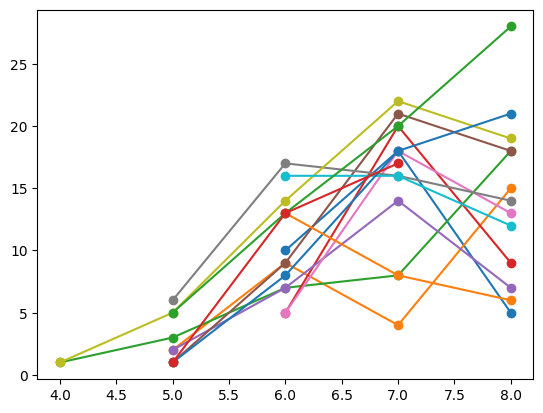

In [51]:
### Code to count the day above 20 degree
sheet_daily = wb.worksheet('daily')
data = sheet_daily.get_all_values()
headers = data[0]
rows = data[1:]
df_daily = pd.DataFrame(rows, columns=headers)
df_daily

df = df_daily

df['Zeitstempel'] = pd.to_datetime(df['Zeitstempel'], format='%d.%m.%Y')

# Extract the month from "Zeitstempel" and create a new column for it
df['Month'] = df['Zeitstempel'].dt.month

# Filter rows where "Wert" is above 25 and count the occurrences for each month
# Convert the 'Wert' column to float64
df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
result = df[df['Wert'] > 25]['Month'].value_counts()

print(result)


# Step 2: Extract the month and year
df['Month'] = df['Zeitstempel'].dt.month
df['Year'] = df['Zeitstempel'].dt.year
# Convert the 'Wert' column to float64
df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
# Step 3: Filter rows with values above 20
df_above_25 = df[df['Wert'] > 20]

# Step 4: Group by month and year, and Step 5: Count the number of values above 25 in each group
result = df_above_25.groupby(['Year', 'Month']).size().reset_index(name='Count')

df_above = df[(df['Wert'] > 20) & (df['Month'].isin([4, 5, 6, 7,8]))]
result  = df_above.groupby(['Year', 'Month']).size().reset_index(name='Count')
for year, group in result.groupby('Year'):
    plt.plot(group['Month'], group['Count'], label=str(year), marker='o', linestyle='-')

pivot_df = result.pivot(index='Month', columns='Year', values='Count')
pivot_df_reversed = pivot_df.iloc[:, ::-1]

print(pivot_df_reversed)


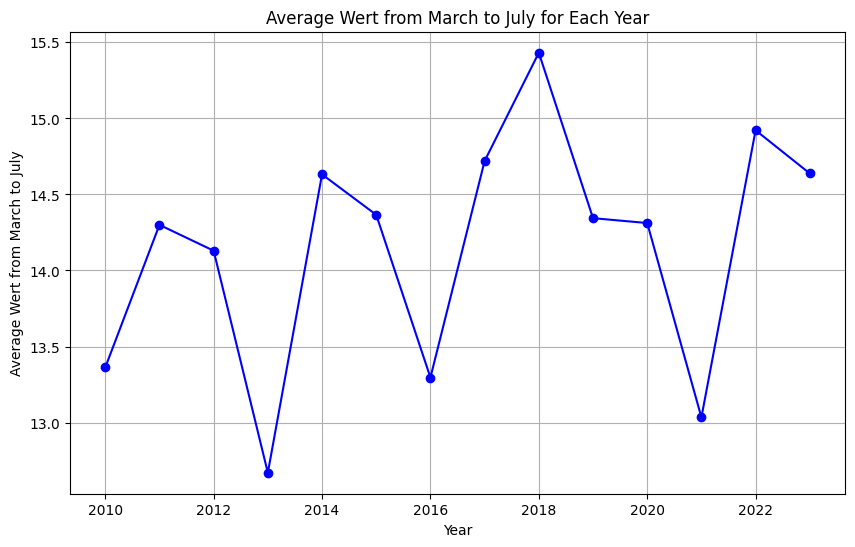

In [ ]:
#### Code to the for each the month march, may, june, july

# Convert the 'Zeitstempel' column to a datetime data type
df['Zeitstempel'] = pd.to_datetime(df['Zeitstempel'], format='%d.%m.%Y')

# Extract the year from the 'Zeitstempel' column and create a new column 'Year'
df['Year'] = df['Zeitstempel'].dt.year

# Filter the data to include only the rows from March to July for each year
df_filtered = df[df['Zeitstempel'].dt.month.isin(range(3, 8))]

# Convert the 'Wert' column to float64
df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
# Group the data by 'Year' and calculate the average of 'Wert' for each year

df_grouped = df_filtered.groupby('Year')['Wert'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Year'], df_grouped['Wert'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Wert from March to July')
plt.title('Average Wert from March to July for Each Year')
plt.grid(True)
plt.show()
# Filter the data to include only the rows from March to July for each year
df_filtered = df[df['Zeitstempel'].dt.month.isin(range(3, 8))]

# Group the data by 'Year' and calculate the average of 'Wert' for each year
df_grouped = df_filtered.groupby('Year')['Wert'].mean().reset_index()

# Get the data for each year from March to July
years = df_grouped['Year'].unique()
data_by_year = {}

for year in years:
    data_by_year[year] = df_filtered[df_filtered['Year'] == year]['Wert'].values

# Plotting the line chart
plt.figure(figsize=(12, 8))

for year in years:
    plt.plot(range(1, 6), data_by_year[year], marker='o', linestyle='-', label=str(year))

plt.xticks(range(1, 6), ['March', 'April', 'May', 'June', 'July'])
plt.xlabel('Months')
plt.ylabel('Average Wert')
plt.title('Average Wert from March to July for Each Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()
df_years = pd.DataFrame(data_by_year)

df_reversed = df_years.iloc[:, ::-1]

print(df_reversed)

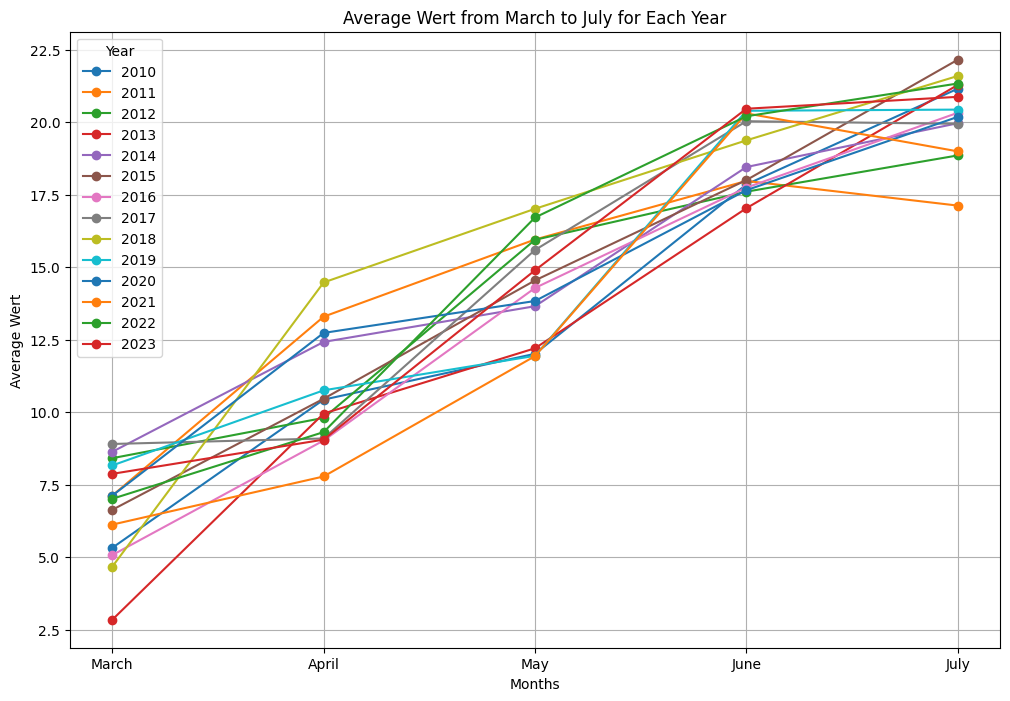

    2023   2022   2021   2020   2019   2018   2017   2016   2015   2014  \
0   7.88   7.02   6.13   7.13   8.17   4.68   8.91   5.08   6.64   8.64   
1   9.06   9.32   7.79  12.74  10.76  14.48   9.10   9.03  10.47  12.43   
2  14.90  16.72  11.94  13.84  11.95  17.02  15.60  14.29  14.55  13.66   
3  20.47  20.21  20.31  17.66  20.40  19.38  20.04  17.75  18.01  18.46   
4  20.88  21.34  19.00  20.19  20.44  21.60  19.95  20.33  22.16  19.97   

    2013   2012   2011   2010  
0   2.85   8.42   7.13   5.33  
1   9.96   9.81  13.30  10.44  
2  12.21  15.95  15.96  12.02  
3  17.04  17.61  17.98  17.86  
4  21.29  18.86  17.13  21.16  
